# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries for data manipulation
import numpy as np
import pandas as pd
#import math

#Definiing the number of displayed columns and rows
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing stats libraries and tools
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

#importing sklearn libraries and tools:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor# import methods to build decision trees regressor
from sklearn.tree import DecisionTreeClassifier # import methods to build decision trees classifier
#from sklearn.ensemble import RandomForestRegressor# import methods to build random forest regressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.ensemble import RandomForestClassifier # import methods to build random forest classifier

from sklearn.preprocessing import LabelEncoder# To encode categorical variables
from sklearn.model_selection import GridSearchCV # For tuning different models

from sklearn import metrics #metrics to evaluate the model
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error # To check model performance

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [2]:
# Command to tell Python to actually display the graphs
%matplotlib inline

Importing the data

In [3]:
# importing drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#path with data
path_extraalearn="/content/drive/MyDrive/COLAB_PROJECT2_week8/ExtraaLearn.csv"
df = pd.read_csv(path_extraalearn)

## Data Overview

- Observations
- Sanity checks

Number of rows and columns

In [5]:
df.shape

(4612, 15)

we can see that there are 4612 rows and 15 columns

Datatypes of the different columns in the dataset

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [7]:
cat_cols = ['status','current_occupation', 'first_interaction','profile_completed','last_activity', 'print_media_type1','print_media_type2','digital_media','educational_channels','referral']
num_cols = ['age','website_visits','time_spent_on_website','page_views_per_visit']

We can see that:
- there are 4612 data (rows), and all of them (4612) are non-null
- ID is a name
- age is an integer
- current_occupation is a name
- first_interaction is a name
- profile_completed is a name
- website_visits  is an integer
- time_spent_on_website is an integer
- page_views_per_visit is a real (float)
- last_activity is a name

- the channels (print_media_type1, print_media_type2, digital_media, educational_channels, referral) are names (object).   
- status (the label/output) is an integer

In addition: the data types are proper, so that there is not need to convert data types.

In [8]:
df.head()

ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   
3  Website Activity                No                No            No   
4    Email Activity                No                No            No   

  educational_channels referral  status  
0                   No       No       1  
1                  Yes       No       0  
2                   No       No       0  
3                   No       No       1  
4                   No       No       0

In [9]:
df.tail()

ID  age current_occupation first_interaction profile_completed  \
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
4607              15                    360                 2.170   
4608               8                   2327                 5.393   
4609               2                    212                 2.692   
4610               1                    154                 3.879   
4611               4                   2290                 2.075   

         last_activity print_media_type1 print_media_type2 digital_media  \
4607    Phone Activity                No                No            No   
4608    Email Activity                No                No            No   
4609    Email Activity                No                No            No   
4610  Website Activity               Yes                No            No   
4611    Phone Activity                No                No            No   

     educational_channels referral  status  
4607                  Yes       No       0  
4608                   No       No       0  
4609                   No       No       1  
4610                   No       No       0  
4611                   No       No       0

Search for missing values:

In [10]:
df.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [11]:
# Checking unique values in each column
df[cat_cols].nunique()

status                  2
current_occupation      3
first_interaction       2
profile_completed       3
last_activity           3
print_media_type1       2
print_media_type2       2
digital_media           2
educational_channels    2
referral                2
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

#Observations:
we can see that:
- there are 4612 rows and 15 columns. The 'info' command indicates that each column has 4612 values.
- the results of the 'isna' command  indicate that there are no missing values. Therefore, none of the variables have missing values
- there are no duplicated data
- NUMERICAL FEATURES are: age, website_visits, time_spent_on_website, page_views_per_visit
- CATEGORICAL FEATURES are: status, current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral
- OUTPUT: status \\

- current_occupation has 3 unique categories
- first_interaction has 2 unique categories
- profile_completed has 3 unique categories
- last_activity has 3 unique categories
- the channels (print_media_type1, print_media_type2, digital_media, educational_channels, referral), each one has 2 unique categories

**Univariate, Bivariate and Multivariate Analysis (Exploratory Data Analysis -EDA)**

- The Univariate, Bivariate and Multivariate Analysis (EDA) is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## **Univariate analysis of numerical columns (Boxplots and histograms)**

 Statistical summary of the data:

In [13]:
df[num_cols].describe(include='all').T

count        mean         std   min        25%  \
age                    4612.0   46.201214   13.161454  18.0   36.00000   
website_visits         4612.0    3.566782    2.829134   0.0    2.00000   
time_spent_on_website  4612.0  724.011275  743.828683   0.0  148.75000   
page_views_per_visit   4612.0    3.026126    1.968125   0.0    2.07775   

                           50%         75%       max  
age                     51.000    57.00000    63.000  
website_visits           3.000     5.00000    30.000  
time_spent_on_website  376.000  1336.75000  2537.000  
page_views_per_visit     2.792     3.75625    18.434

Observations:

- For the numerical features (age, website_visits, time_spent_on_website,
page_views_per_visit), there are no illogical values  
- The minimum value of age is 18, and the maximum is 63. These values are realistic.
- For [ website_visits, time_spent_on_website,
page_views_per_visit], the minimum value of is 0; and their maximum values are 30, 2537, 18.4. These values are realistic.  

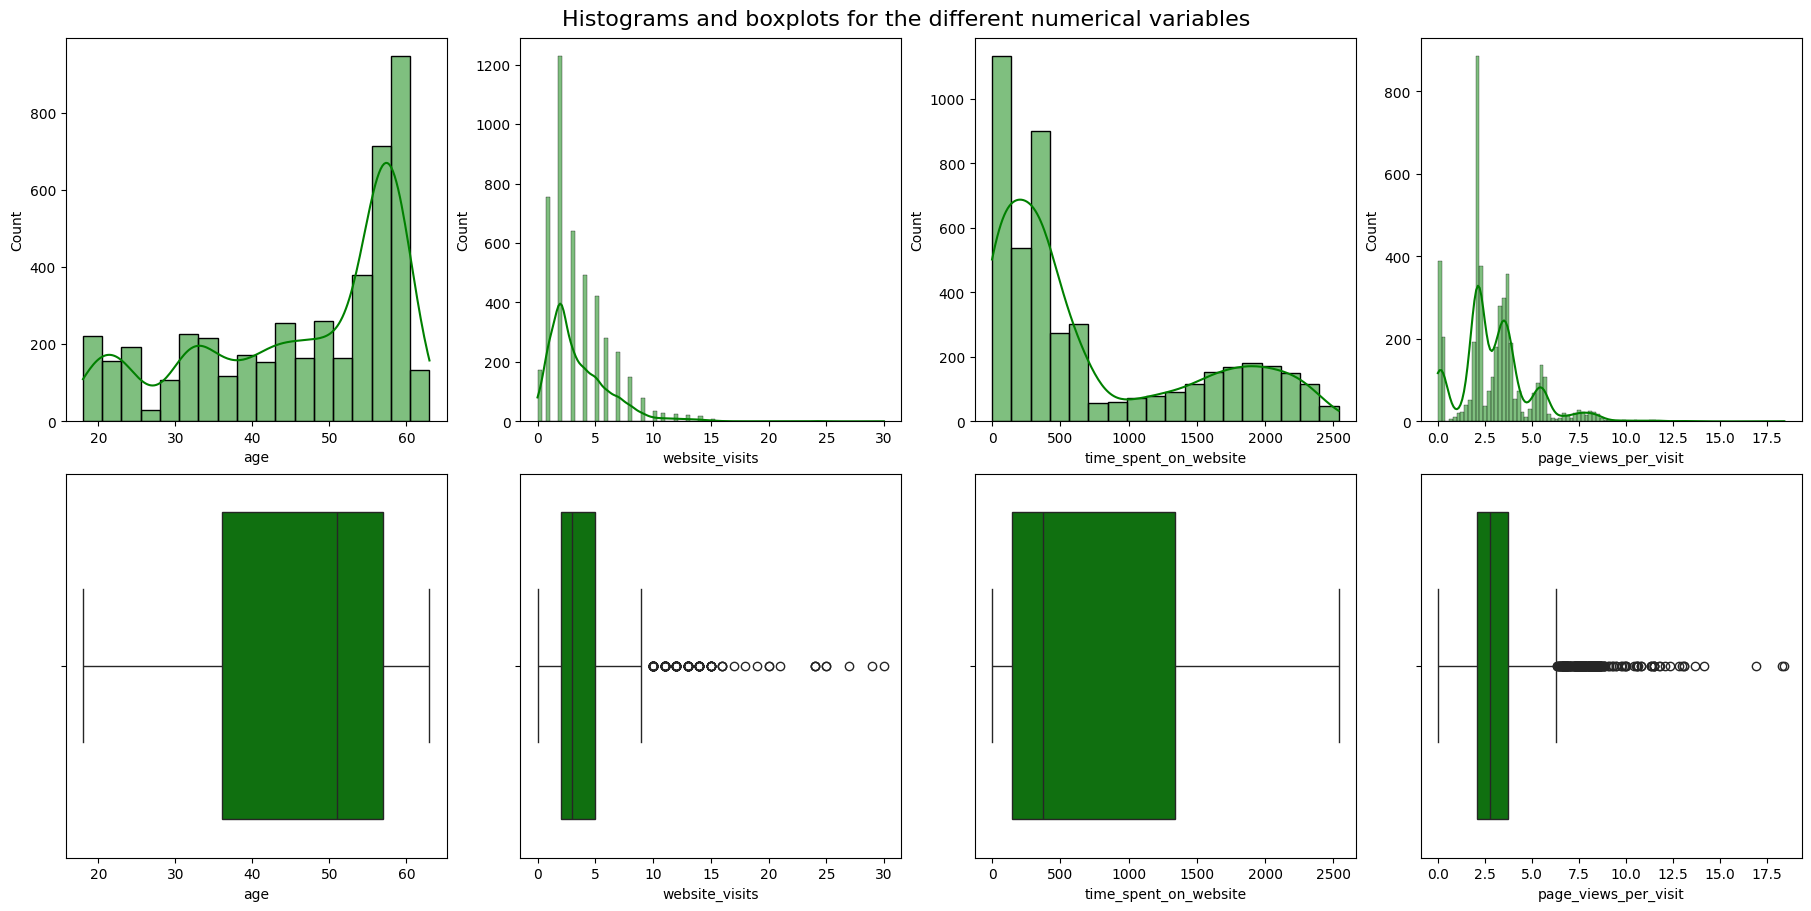

In [14]:
fig, axes = plt.subplots(2, 4, sharex=False, constrained_layout=True, figsize=(18,9))#(16,8)
fig.suptitle('Histograms and boxplots for the different numerical variables', fontsize=16)
sns.histplot(ax=axes[0, 0], data=df, x='age',color='green',kde = True);
sns.histplot(ax=axes[0, 1], data=df, x='website_visits',color='green',kde = True);
sns.histplot(ax=axes[0,2], data=df, x='time_spent_on_website',color='green',kde = True);
sns.histplot(ax=axes[0,3], data=df, x='page_views_per_visit',color='green',kde = True);

sns.boxplot(ax=axes[1, 0], data=df, x='age',color='green');
sns.boxplot(ax=axes[1, 1], data=df, x='website_visits',color='green');
sns.boxplot(ax=axes[1,2], data=df, x='time_spent_on_website',color='green');
sns.boxplot(ax=axes[1,3], data=df, x='page_views_per_visit',color='green');

Boxplot:

In [15]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )

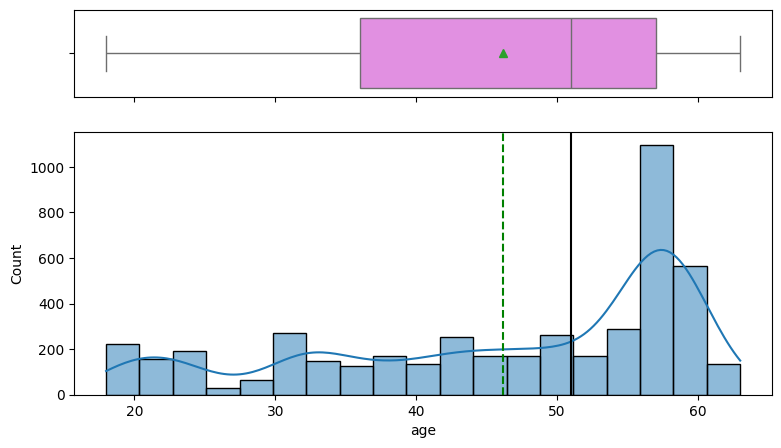

In [16]:
histogram_boxplot(df, "age", kde = True, bins = 19)

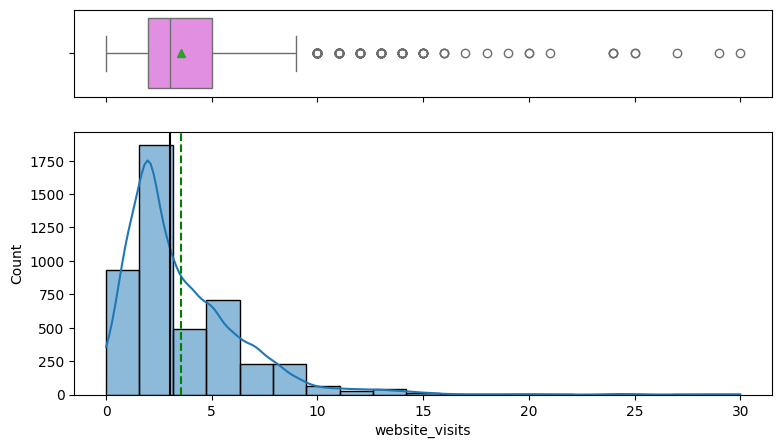

In [17]:
histogram_boxplot(df, "website_visits", kde = True, bins = 19)

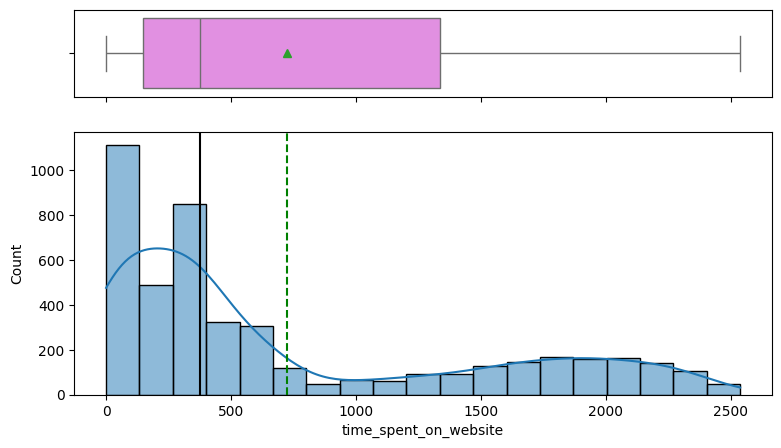

In [18]:
histogram_boxplot(df, "time_spent_on_website", kde = True, bins = 19)

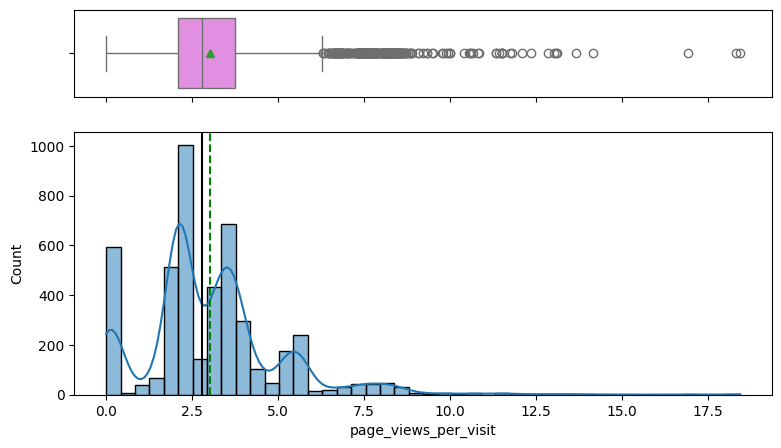

In [19]:
histogram_boxplot(df, "page_views_per_visit", kde = True, bins = 44)

**Observations:**

- age: the distribution of age is not normal, it is left skewed asymmetrical.
 There is a higher number of people with age in the range 55-65 years.
- website_visits: the distribution is not normal; it is right skewed.
 There is a higher number of website visits in the range 3-4 visits.     
- time_spent_on_website: the distribution is not normal; it is right-skewed
 and it seems bimodal. There is a higher number of cases with time_spent_on_websit in the range 0-400.
- page_views_per_visit: the distribution is not normal; it is right-skewed
and it seems bimodal. There is a higher number of cases with page_views_per_visit in the range 2.0-2.4.

## **Univariate analysis of categorical columns (countplots)**

In [20]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

status
0    0.701431
1    0.298569
Name: proportion, dtype: float64
****************************************
current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
N

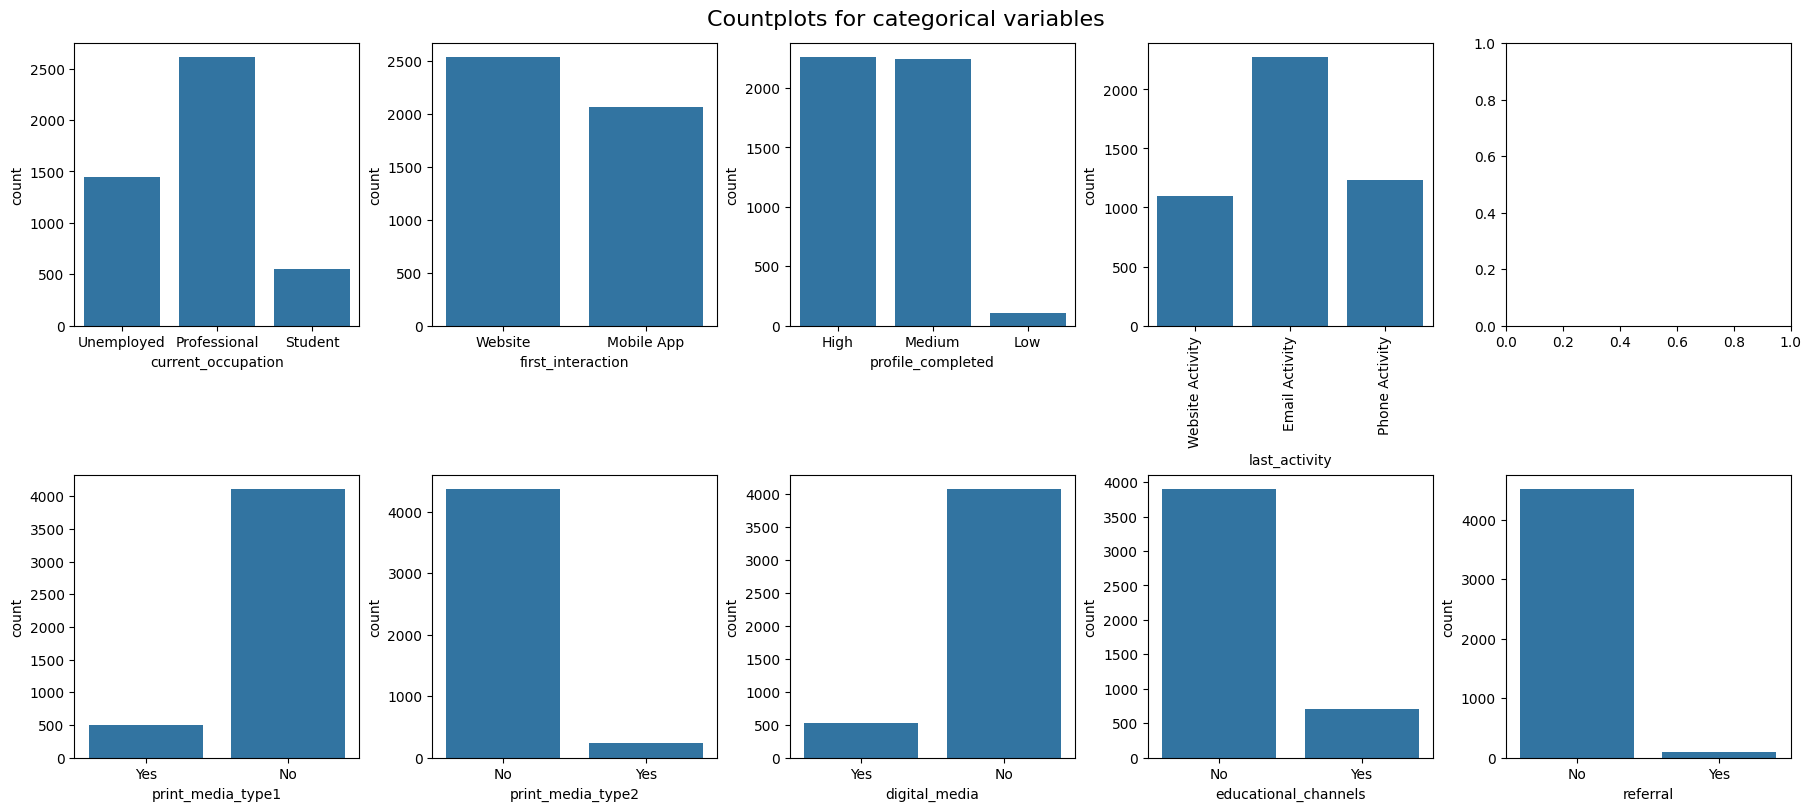

In [21]:
fig, axes = plt.subplots(2, 5, sharex=False, constrained_layout=True, figsize=(18,8))#(16,8)
fig.suptitle('Countplots for categorical variables', fontsize=16)

sns.countplot(ax=axes[0, 0], data=df, x='current_occupation') ;
sns.countplot(ax=axes[0, 1], data=df, x='first_interaction') ;
sns.countplot(ax=axes[0,2], data=df, x='profile_completed') ;
sns.countplot(ax=axes[0,3], data=df, x='last_activity');
axes[0,3].tick_params(axis = 'x', rotation=90)

#Figures for channels:
sns.countplot(ax=axes[1, 0], data=df, x='print_media_type1') ;
sns.countplot(ax=axes[1, 1], data=df, x='print_media_type2') ;
sns.countplot(ax=axes[1,2], data=df, x='digital_media') ;
sns.countplot(ax=axes[1,3], data=df, x='educational_channels');
sns.countplot(ax=axes[1,4], data=df, x='referral');

**Observations:**

- status: the rate of paid customers is 29%
- current_occupation: 56.7% is professional, 31% unemployed, and 12% student
- first_interaction: 55% of the leads used website as first interaction media,
 and 44.9 used mobile app.   
- profile_completed: 49% of the leads had a high completion of the profile, 48.5% had a medium completion, and 2.3% had a low completion
- last_activity: 49.3% of the leads used Email as last activity,
 26.7% used phone, and 23.9 used website as last activity.
   
- print_media_type1: 10.8% of the leads saw the ad of ExtraaLearn in the Newspaper.
- print_media_type2: 5% of the leads saw the ad of ExtraaLearn in the Magazine
- digital_media: 11.4% of the leads saw the ad of ExtraaLearn in the digital platforms.  
- educational_channels: 15.3% of the leads heard about ExtraaLearn in educational channels.  
- referral: 2% of the leads heard about ExtraaLearn through reference.   

## Bivariate and multivariate analysis

Countplots

In [ ]:
#fig, axes = plt.subplots(1, 2, sharex=False, figsize=(11,6))#(16,8)
#sns.countplot(ax=axes[0], data=df, x='current_occupation', hue='age',) ;
#sns.countplot(ax=axes[1], data=df, x='profile_completed', hue='current_occupation') ;

Let's now check how does status is related with other categorical variables.

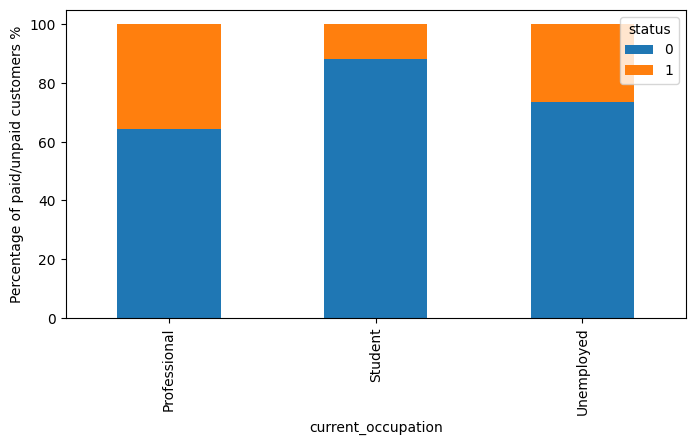

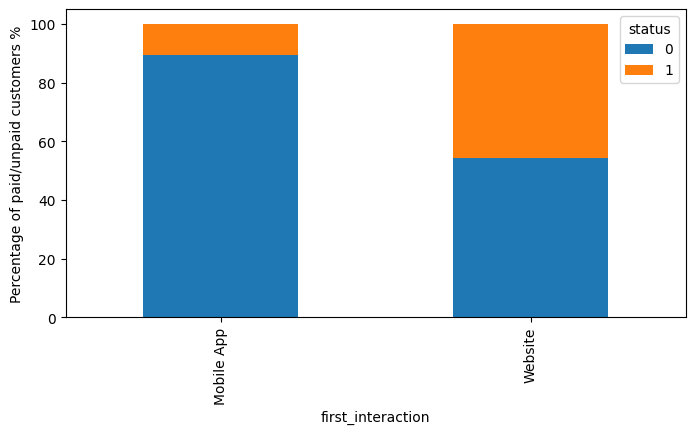

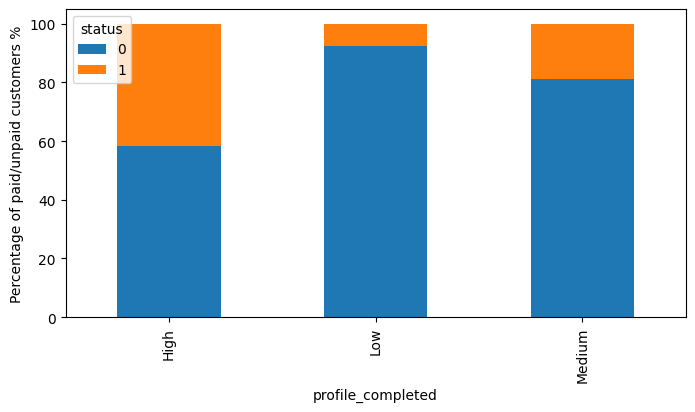

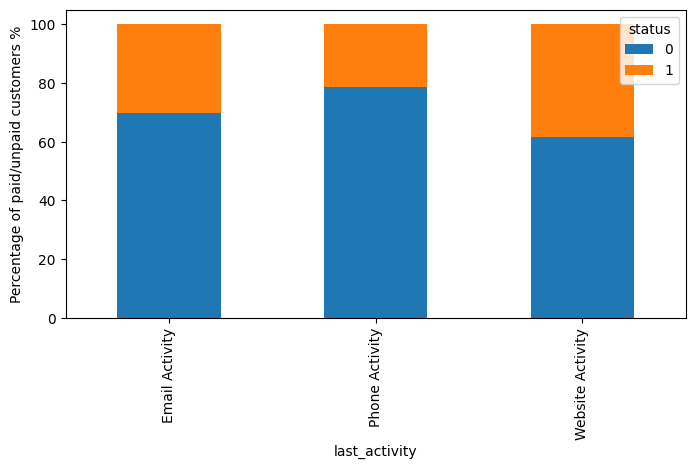

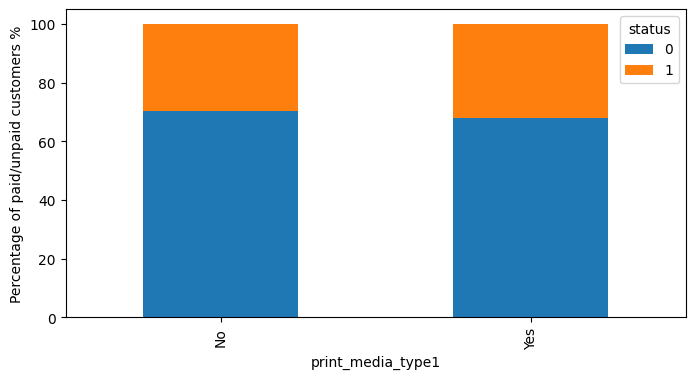

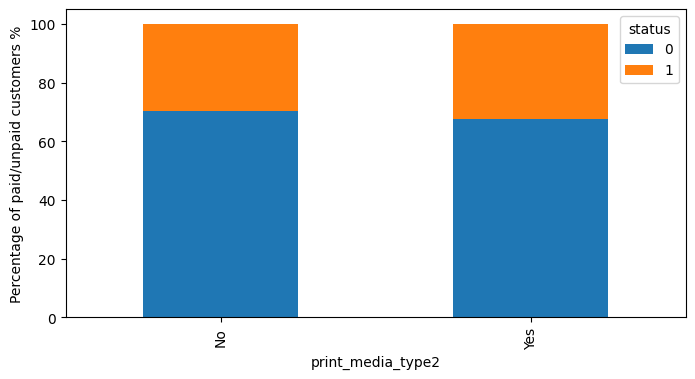

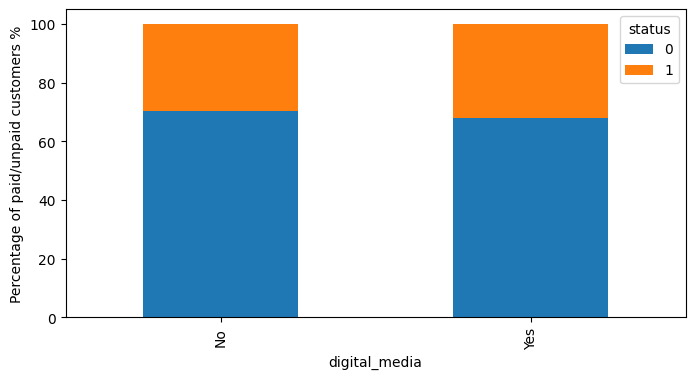

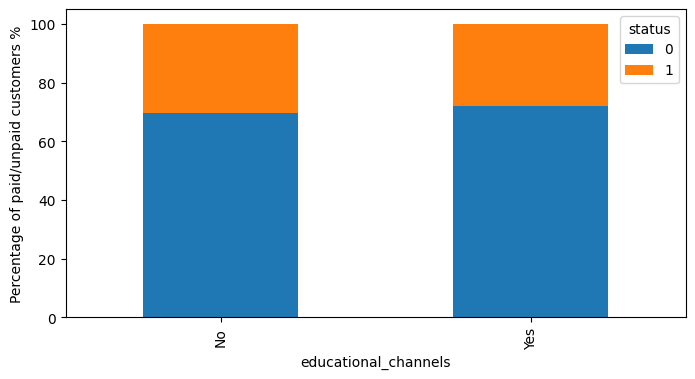

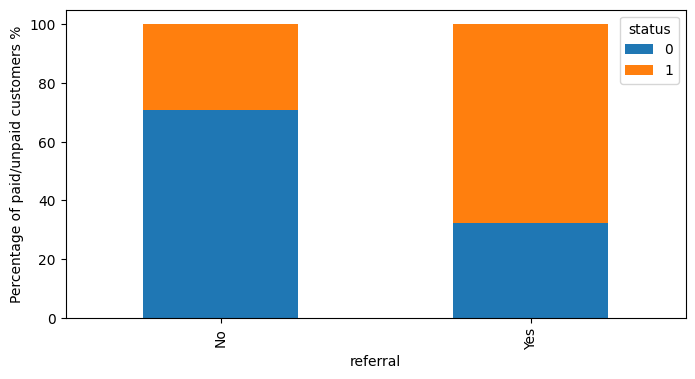

In [22]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage of paid/unpaid customers %')

## Bivariate and Multivariate analysis for lead status and (current_occupation, first_interaction, profile_completed and last_activity), which are categorical variables non related to communication channels

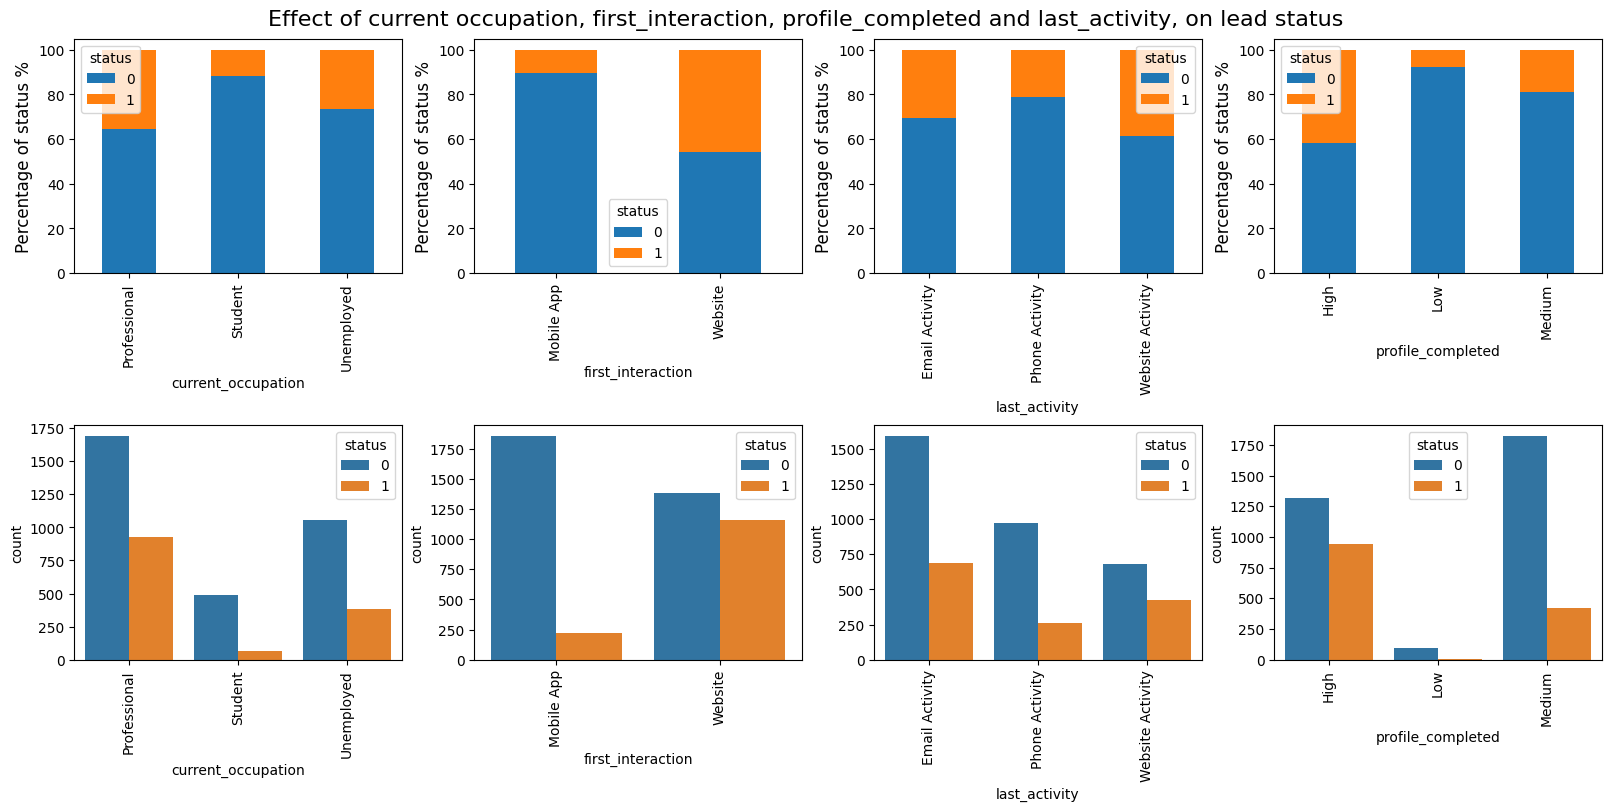

In [23]:
fig, axes = plt.subplots(2, 4, sharex=False, constrained_layout=True, figsize=(16,8))#(16,8)
fig.suptitle('Effect of current occupation, first_interaction, profile_completed and last_activity, on lead status', fontsize=16)

(pd.crosstab(df['current_occupation'],df['status'],normalize='index')*100).plot(ax=axes[0,0], kind='bar',stacked=True)
axes[0,0].set_ylabel('Percentage of status %', fontsize=12) #plt.ylabel('Percentage of status yes %')

(pd.crosstab(df['first_interaction'],df['status'],normalize='index')*100).plot(ax=axes[0,1], kind='bar',stacked=True)
axes[0,1].set_ylabel('Percentage of status %', fontsize=12)

(pd.crosstab(df['last_activity'],df['status'],normalize='index')*100).plot(ax=axes[0,2], kind='bar',stacked=True)
axes[0,2].set_ylabel('Percentage of status %', fontsize=12)

(pd.crosstab(df['profile_completed'],df['status'],normalize='index')*100).plot(ax=axes[0,3], kind='bar',stacked=True)
axes[0,3].set_ylabel('Percentage of status %', fontsize=12);
#
#Plots with the counts
order_list = ['Professional', 'Student', 'Unemployed']
sns.countplot(ax = axes[1,0], data = df, order=order_list, x = 'current_occupation', hue = 'status');
axes[1,0].tick_params(axis = 'x', rotation=90)
#ax.tick_params(axis='x', rotation=90)

order_list = ['Mobile App', 'Website']
sns.countplot(ax = axes[1,1], data = df, order=order_list, x = 'first_interaction', hue = 'status');
axes[1,1].tick_params(axis = 'x', rotation=90)

order_list_la = ['Email Activity', 'Phone Activity', 'Website Activity']
sns.countplot(ax = axes[1,2], data = df, order=order_list_la, x = 'last_activity', hue = 'status');
axes[1,2].tick_params(axis = 'x', rotation=90)

order_list_pf = ['High', 'Low', 'Medium']
sns.countplot(ax = axes[1,3], data = df, order=order_list_pf, x = 'profile_completed', hue = 'status');
axes[1,3].tick_params(axis = 'x', rotation=90)
#  order_list = ['A', 'B', 'C']
#    sns.countplot(x='category', data=df, order=order_list)
#    plt.show()

**Determination of the percentages of status, for each of the channels**

In [24]:
#current_occupation:
subgroup_totals = ( #Calculation of count of each status value, as subgroups of each current_occupation value:
    df.groupby(['current_occupation', 'status'])
    .size()
    .reset_index(name = 'count1'));
df_aggreg_countperprint1 = (  #This is the calculation of the count of each current_occupation values
    subgroup_totals.groupby(['current_occupation']).agg(
    count2 = ('count1','sum'))
    .reset_index());
subgroup_totals2 = subgroup_totals.merge(df_aggreg_countperprint1, on = ['current_occupation']);#Merge the totals (df_aggreg_countperprint1) back into the original DataFrame:
subgroup_totals2['Percentage'] = (subgroup_totals2['count1'] / subgroup_totals2['count2']) * 100 # Calculate the percentage of each value within its subgroup
print('Percentages for current_occupation are: \n',subgroup_totals2);
#
#first_interaction:
subgroup_totals = ( #Calculation of count of each status value, as subgroups of each first_interaction value:
    df.groupby(['first_interaction', 'status'])
    .size()
    .reset_index(name = 'count1'));
df_aggreg_countperprint1 = (  #This is the calculation of the count of each first_interaction values
    subgroup_totals.groupby(['first_interaction']).agg(
    count2 = ('count1','sum'))
    .reset_index());
subgroup_totals2 = subgroup_totals.merge(df_aggreg_countperprint1, on = ['first_interaction']);#Merge the totals (df_aggreg_countperprint1) back into the original DataFrame:
subgroup_totals2['Percentage'] = (subgroup_totals2['count1'] / subgroup_totals2['count2']) * 100 # Calculate the percentage of each value within its subgroup
print('\n Percentages for first_interaction are: \n',subgroup_totals2);
#
#last_activity:
subgroup_totals = ( #Calculation of count of each status value, as subgroups of each last_activity
    df.groupby(['last_activity', 'status'])
    .size()
    .reset_index(name = 'count1'));
df_aggreg_countperprint1 = (  #This is the calculation of the count of each last_activity values
    subgroup_totals.groupby(['last_activity']).agg(
    count2 = ('count1','sum'))
    .reset_index());
subgroup_totals2 = subgroup_totals.merge(df_aggreg_countperprint1, on = ['last_activity']);#Merge the totals (df_aggreg_countperprint1) back into the original DataFrame:
subgroup_totals2['Percentage'] = (subgroup_totals2['count1'] / subgroup_totals2['count2']) * 100 # Calculate the percentage of each value within its subgroup
print('\n Percentages for last_activity are: \n',subgroup_totals2);
#
#profile_completed:
subgroup_totals = ( #Calculation of count of each status value, as subgroups of each profile_completed value:
    df.groupby(['profile_completed', 'status'])
    .size()
    .reset_index(name = 'count1'));
df_aggreg_countperprint1 = (  #This is the calculation of the count of each profile_completed values
    subgroup_totals.groupby(['profile_completed']).agg(
    count2 = ('count1','sum'))
    .reset_index());
subgroup_totals2 = subgroup_totals.merge(df_aggreg_countperprint1, on = ['profile_completed']);#Merge the totals (df_aggreg_countperprint1) back into the original DataFrame:
subgroup_totals2['Percentage'] = (subgroup_totals2['count1'] / subgroup_totals2['count2']) * 100 # Calculate the percentage of each value within its subgroup
print('\n Percentages for profile_completed are: \n',subgroup_totals2);
#

Percentages for current_occupation are: 
   current_occupation  status  count1  count2  Percentage
0       Professional       0    1687    2616   64.487768
1       Professional       1     929    2616   35.512232
2            Student       0     490     555   88.288288
3            Student       1      65     555   11.711712
4         Unemployed       0    1058    1441   73.421235
5         Unemployed       1     383    1441   26.578765

 Percentages for first_interaction are: 
   first_interaction  status  count1  count2  Percentage
0        Mobile App       0    1852    2070   89.468599
1        Mobile App       1     218    2070   10.531401
2           Website       0    1383    2542   54.405980
3           Website       1    1159    2542   45.594020

 Percentages for last_activity are: 
       last_activity  status  count1  count2  Percentage
0    Email Activity       0    1587    2278   69.666374
1    Email Activity       1     691    2278   30.333626
2    Phone Activity       0  

**Observations (effect of current occupation, first_interaction, profile_completed and last_activity, on percentage of lead status):**
- from these categorical variables (effect of current occupation, first_interaction, profile_completed and last_activity), the highest percentage of leads is attained by first interaction (value Website)
- the order of these variables, from the one with highest conversion rate to the one with lowest conversion rate is: first interaction, profile completed, last activity, current occupation:
 - first interaction: website (value = Website) achieved higher conversion (45.5% are successful). Among the leads whose first interaction is through website, there is approximately 45.5% chance of becoming paid customer.
 - profile completed: high level of completion (value = 'High') exhibits higher conversion (41.8% are successful). Among the leads that have a high completion of profile, there is approximately 41.8% chance of becoming paid customer.
 - last activity: website activity (value = 'Website activity') exhibits higher conversion (38.4% are successful). Among the leads whose last activity is Website, there is approximately 38.4% chance of becoming paid customer.
 - current occupation: professional (value = 'Professional') exhibits higher conversion (35.5% are successful). Among professional leads there is approximately 35.5% chance of becoming paid customer.   

**ANSWER TO QUESTIONS 1,2,3,5**

**First question (effect of 'current_occupation')**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

**Answer:**

- the best conversion rate is attained by Professional, with 35.5%
- the conversion rate for unemployed is 26.6%
- conversion rate for student is 11.7%

**Second question ('first_interaction')**
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

**Answer:**
- the best conversion rate is attained by Website, with 45.6% chance
- the conversion rate for Mobile app is 10.5%

**Third question ('last activity')**
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

**Answer:**:
- the best conversion rate is attained by Website, with 38.5%
- the conversion rate for Email is 30.3%
- the conversion rate for Phone is 21.3%

**Fifth question (effect of profile completion)**

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Answer:**
- the answer is yes: the highest conversion rate is attained for High completion of profile with 41.8%;
- In addition, Medium completion exhibits conversion rate of 18.9%, and Low completion exhibits conversion rate of 7.5%

## Bivariate and multivariate analysis for lead status and channels (print media, digital media, educational channels, referrals).
Effect channels (print media, digital media, educational channels, referrals) on lead status

Text(0, 0.5, 'Percentage of status %')

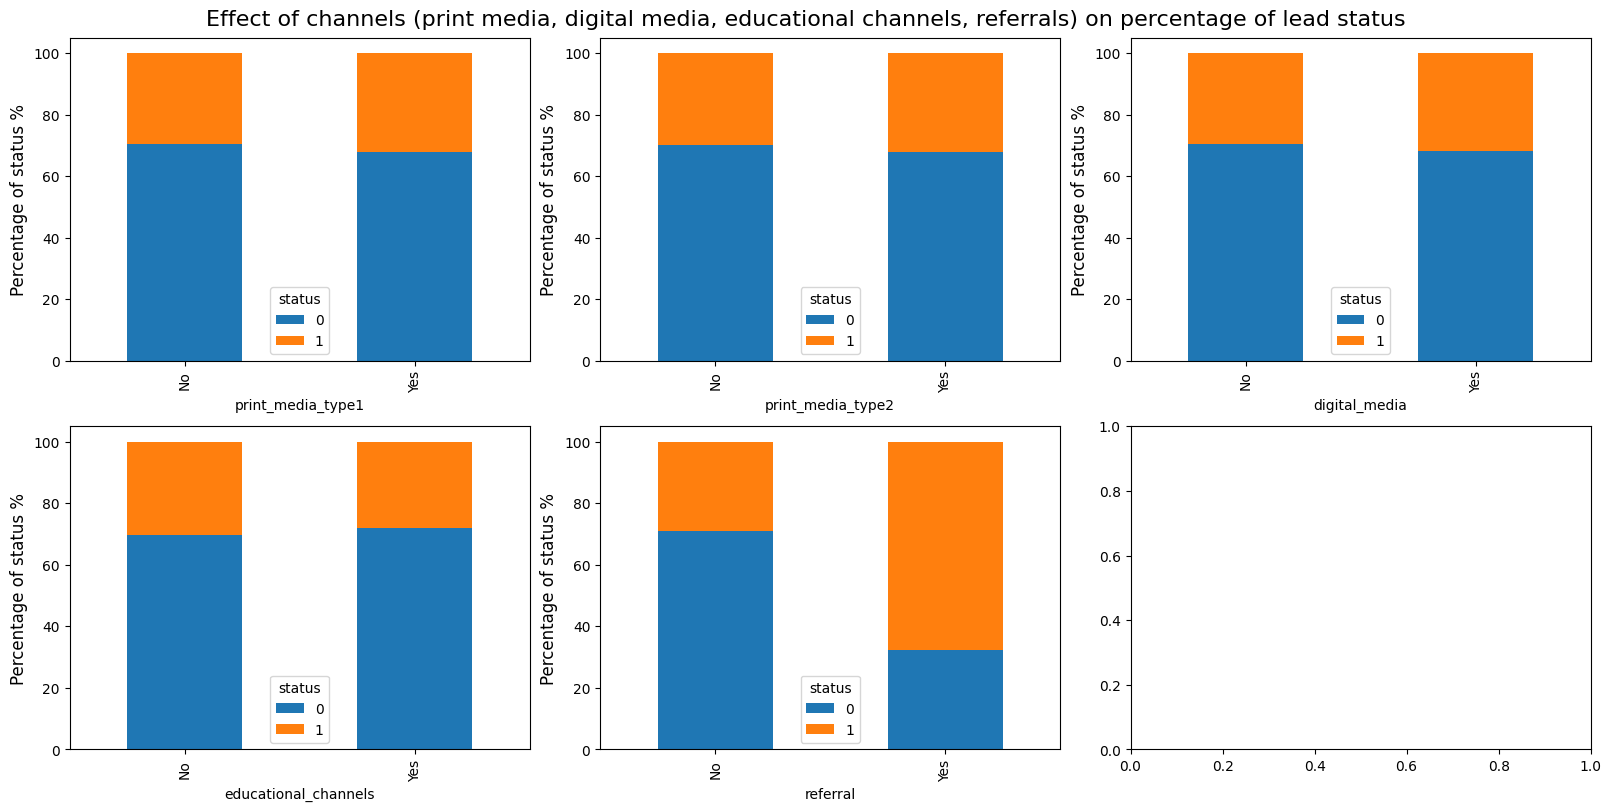

In [25]:
fig, axes = plt.subplots(2, 3, sharex=False, constrained_layout=True, figsize=(16,8))#(16,6)
fig.suptitle('Effect of channels (print media, digital media, educational channels, referrals) on percentage of lead status', fontsize=16)
#print_media_type1:
(pd.crosstab(df['print_media_type1'],df['status'],normalize='index')*100).plot(ax=axes[0,0], kind='bar',stacked=True)
axes[0,0].set_ylabel('Percentage of status %', fontsize=12)
#print_media_type2:
(pd.crosstab(df['print_media_type2'],df['status'],normalize='index')*100).plot(ax=axes[0,1], kind='bar',stacked=True)
axes[0,1].set_ylabel('Percentage of status %', fontsize=12)
#digital_media:
(pd.crosstab(df['digital_media'],df['status'],normalize='index')*100).plot(ax=axes[0,2], kind='bar',stacked=True)
axes[0,2].set_ylabel('Percentage of status %', fontsize=12)
#educational_channels:
(pd.crosstab(df['educational_channels'],df['status'],normalize='index')*100).plot(ax=axes[1,0], kind='bar',stacked=True)
axes[1,0].set_ylabel('Percentage of status %', fontsize=12)
#referral:
(pd.crosstab(df['referral'],df['status'],normalize='index')*100).plot(ax=axes[1,1], kind='bar',stacked=True)
axes[1,1].set_ylabel('Percentage of status %', fontsize=12)

Determination of the percentages of status, for each of the channels

In [26]:
#Print_media_type1
subgroup_totals = ( #Calculation of count of each status value, as subgroups of each print_media_type1 value:
    df.groupby(['print_media_type1', 'status'])
    .size()
    .reset_index(name = 'count1'));
df_aggreg_countperprint1 = (  #This is the calculation of the count of each print_media_type1 values
    subgroup_totals.groupby(['print_media_type1']).agg(
    count2 = ('count1','sum'))
    .reset_index());
subgroup_totals2 = subgroup_totals.merge(df_aggreg_countperprint1, on = ['print_media_type1']);#Merge the totals (df_aggreg_countperprint1) back into the original DataFrame:
subgroup_totals2['Percentage'] = (subgroup_totals2['count1'] / subgroup_totals2['count2']) * 100 # Calculate the percentage of each value within its subgroup
print('Percentages for print_media_type1 are: \n',subgroup_totals2);
#
#Print_media_type2
subgroup_totals = ( #Calculation of count of each status value, as subgroups of each print_media_type2 value:
    df.groupby(['print_media_type2', 'status'])
    .size()
    .reset_index(name = 'count1'));
df_aggreg_countperprint1 = (  #This is the calculation of the count of each print_media_type2 values
    subgroup_totals.groupby(['print_media_type2']).agg(
    count2 = ('count1','sum'))
    .reset_index());
subgroup_totals2 = subgroup_totals.merge(df_aggreg_countperprint1, on = ['print_media_type2']);#Merge the totals (df_aggreg_countperprint1) back into the original DataFrame:
subgroup_totals2['Percentage'] = (subgroup_totals2['count1'] / subgroup_totals2['count2']) * 100 # Calculate the percentage of each value within its subgroup
print('\n Percentages for print_media_type2 are: \n',subgroup_totals2);
#
#Digital media
subgroup_totals = ( #Calculation of count of each status value, as subgroups of each digital_media value:
    df.groupby(['digital_media', 'status'])
    .size()
    .reset_index(name = 'count1'));
df_aggreg_countperprint1 = (  #This is the calculation of the count of each digital_media values
    subgroup_totals.groupby(['digital_media']).agg(
    count2 = ('count1','sum'))
    .reset_index());
subgroup_totals2 = subgroup_totals.merge(df_aggreg_countperprint1, on = ['digital_media']);#Merge the totals (df_aggreg_countperprint1) back into the original DataFrame:
subgroup_totals2['Percentage'] = (subgroup_totals2['count1'] / subgroup_totals2['count2']) * 100 # Calculate the percentage of each value within its subgroup
print('\nPercentages for digital media are: \n',subgroup_totals2);
#
#Educational_channels
subgroup_totals = ( #Calculation of count of each status value, as subgroups of each Educational_channels value:
    df.groupby(['educational_channels', 'status'])
    .size()
    .reset_index(name = 'count1'));
df_aggreg_countperprint1 = (  #This is the calculation of the count of each educational_channels values
    subgroup_totals.groupby(['educational_channels']).agg(
    count2 = ('count1','sum'))
    .reset_index());
subgroup_totals2 = subgroup_totals.merge(df_aggreg_countperprint1, on = ['educational_channels']);#Merge the totals (df_aggreg_countperprint1) back into the original DataFrame:
subgroup_totals2['Percentage'] = (subgroup_totals2['count1'] / subgroup_totals2['count2']) * 100 # Calculate the percentage of each value within its subgroup
print('\n Percentages for educational_channels are: \n',subgroup_totals2);
#
#referral
subgroup_totals = ( #Calculation of count of each status value, as subgroups of each referral value:
    df.groupby(['referral', 'status'])
    .size()
    .reset_index(name = 'count1'));
df_aggreg_countperprint1 = (  #This is the calculation of the count of each referral values
    subgroup_totals.groupby(['referral']).agg(
    count2 = ('count1','sum'))
    .reset_index());
subgroup_totals2 = subgroup_totals.merge(df_aggreg_countperprint1, on = ['referral']);#Merge the totals (df_aggreg_countperprint1) back into the original DataFrame:
subgroup_totals2['Percentage'] = (subgroup_totals2['count1'] / subgroup_totals2['count2']) * 100 # Calculate the percentage of each value within its subgroup
print('\n Percentages for referral are: \n',subgroup_totals2);
#

Percentages for print_media_type1 are: 
   print_media_type1  status  count1  count2  Percentage
0                No       0    2897    4115   70.400972
1                No       1    1218    4115   29.599028
2               Yes       0     338     497   68.008048
3               Yes       1     159     497   31.991952

 Percentages for print_media_type2 are: 
   print_media_type2  status  count1  count2  Percentage
0                No       0    3077    4379   70.267184
1                No       1    1302    4379   29.732816
2               Yes       0     158     233   67.811159
3               Yes       1      75     233   32.188841

Percentages for digital media are: 
   digital_media  status  count1  count2  Percentage
0            No       0    2876    4085   70.403917
1            No       1    1209    4085   29.596083
2           Yes       0     359     527   68.121442
3           Yes       1     168     527   31.878558

 Percentages for educational_channels are: 
   educationa

**Observations (effect of channels (print media, digital media, educational channels, referrals) on lead status):**
- the percentage of paid customers depends on channels as follows: it exhibits a strong dependence with respect to referral, and a weak or negligible dependence with respect to other channels.

Highest effects:
- referral: among the leads that heard about ExtraaLearn through reference,
there is approximately 67.7% chance of becoming paid customer.

Lower effects:
- print_media_type1: among the leads that saw the ad of ExtraaLearn in the Newspaper, there is approximately 32% chance of becoming paid customer.  
- print_media_type2: among the leads that saw the ad of ExtraaLearn in the Magazine, there is approximately 32.2% chance of becoming paid customer.
- digital_media: among the leads that saw the ad of ExtraaLearn in the digital platforms, there is approximately 31.9% chance of becoming paid customer.
- educational_channels: among the leads that heard about ExtraaLearn in educational channels, there is approximately 27.9% chance of becoming paid customer.

**Fourth question**

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

**Answer:**
From the channels, eg print media, digital media, referrals, etc, the higest conversion rate is attained by referral.

## Bivariate and multivariate analysis for numerical variables

Now, we examine the dependence of status with respect to numerical variables.

In [27]:
# Mean of numerical variables grouped by attrition
df.groupby(['status'])[num_cols].mean()

age  website_visits  time_spent_on_website  page_views_per_visit
status                                                                        
0       45.153014        3.578980             577.420711              3.025732
1       48.663762        3.538126            1068.397967              3.027050

**Observations:**
- paid customers are 7.8 % older than unpaid ones \
- paid customers  have 85% more time spent on website than unpaid customers


**Barplot figures for the effect of numerical variables on percentage of paid/unpaid customers**

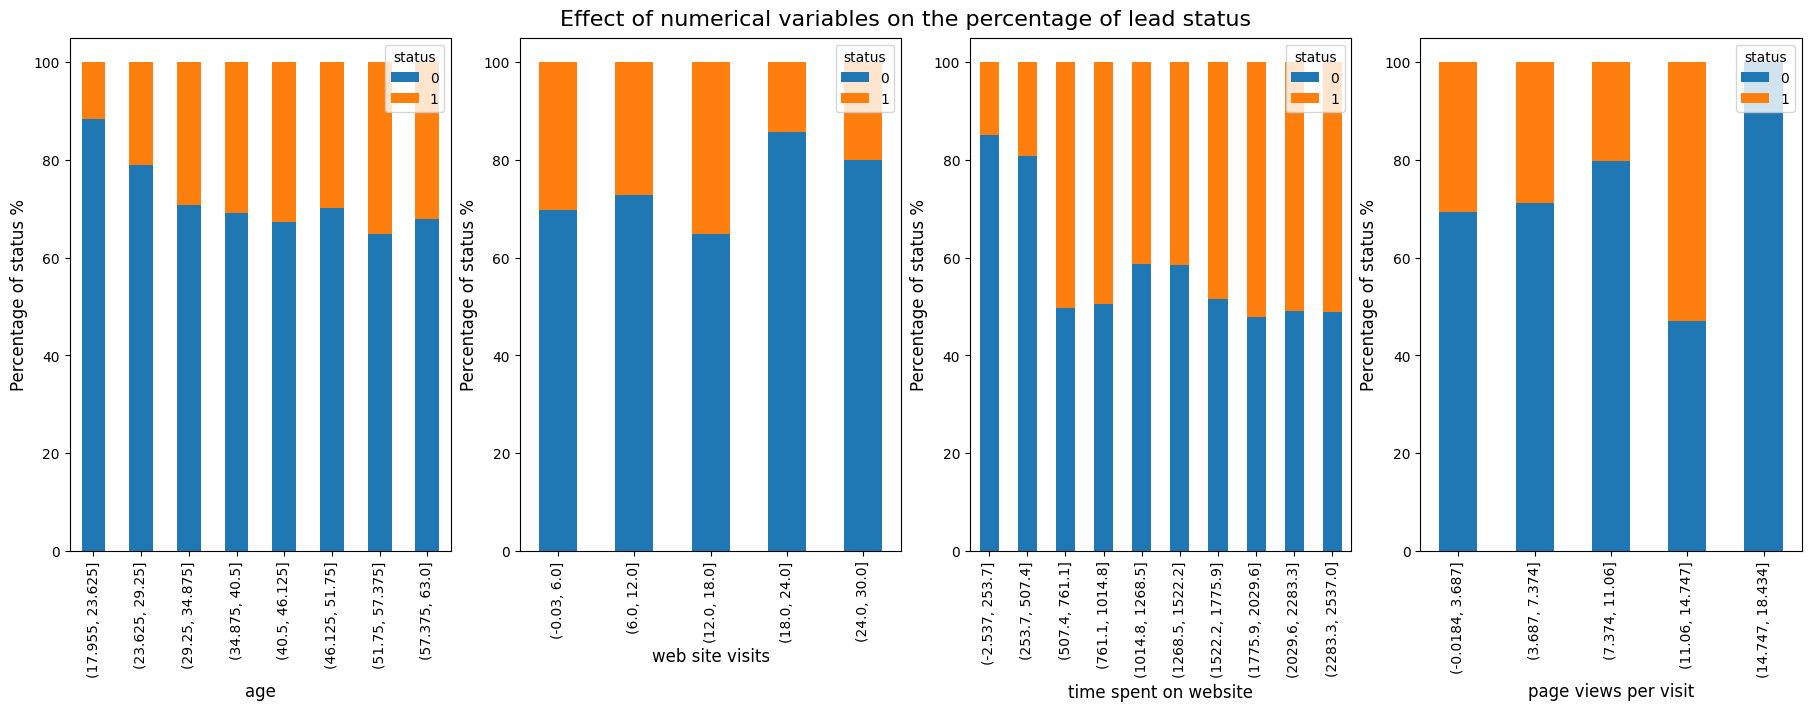

In [56]:
fig, axes = plt.subplots(1, 4, sharex=False, constrained_layout=True, figsize=(18,7))#(16,8)
fig.suptitle('Effect of numerical variables on the percentage of lead status', fontsize=16)

#First subfigure. Development of binned age for first subfigure
array_foragebins = pd.array(df['age'])
df['binned_age'] = pd.cut(array_foragebins, bins = 8)
(pd.crosstab(df['binned_age'],df['status'],normalize='index')*100).plot(ax=axes[0], kind='bar',stacked=True)
axes[0].set_ylabel('Percentage of status %', fontsize=12)
axes[0].set_xlabel('age', fontsize=12)
#
#Second subfigure. Development of binned website visits for second subfigure
array_forwebvisitsbins = pd.array(df['website_visits'])
df['binned_webvisits'] = pd.cut(array_forwebvisitsbins, bins = 5)
(pd.crosstab(df['binned_webvisits'],df['status'],normalize='index')*100).plot(ax=axes[1], kind='bar',stacked=True)
axes[1].set_ylabel('Percentage of status %', fontsize=12)
axes[1].set_xlabel('web site visits', fontsize=12)
#
#Third subfigure. Development of binned time_spent_on_website for third subfigure #time_spent_on_website
array_fortimeonweb = pd.array(df['time_spent_on_website'])
df['binned_timeonweb'] = pd.cut(array_fortimeonweb, bins = 10)
(pd.crosstab(df['binned_timeonweb'],df['status'],normalize='index')*100).plot(ax=axes[2], kind='bar',stacked=True)
axes[2].set_ylabel('Percentage of status %', fontsize=12)
axes[2].set_xlabel('time spent on website', fontsize=12)
#
#Fourth subfigure. Development of binned page_views_per_visit for fourth subfigure #page_views_per_visit
array_forviewspervisit = pd.array(df['page_views_per_visit'])
df['binned_viewspervisit'] = pd.cut(array_forviewspervisit, bins = 5)
(pd.crosstab(df['binned_viewspervisit'],df['status'],normalize='index')*100).plot(ax=axes[3], kind='bar',stacked=True)
axes[3].set_ylabel('Percentage of status %', fontsize=12)
axes[3].set_xlabel('page views per visit', fontsize=12)

#Fifth subfigure
#sns.barplot(x='binned_cost', y = 'rating', data = NewdfSpanish, ax = axes[1,1])
#axes[1,1].tick_params(rotation=90)#xticks(rotation=90)
#axes[1,1].set_title('rating vs cost ranges')


#


#Elimination of the columns corresponding to binned vales
df.drop(['binned_age','binned_webvisits','binned_timeonweb','binned_viewspervisit'], axis=1, inplace=True)

#df_forModel.head()

**Observations:**

The dependence of the percentage of paid customers as function of the numerical variables (age, web site visits, time spent on website, and page views per visit) is as follows:

- The four numerical variables exhibit a high effect on the status %.
- The age values higher than 30 years exhibit higher positive status % compared to age lower than 30.
- Time spent on website higher than 507 exhibits a higher positive status % compared to values lower than 507.
- Page views per visit in the range 11 to 14 exhibits a higher positive status % compared to other values.


**Numerical variables as function of current occupation**

Boxplots:

<Axes: xlabel='current occupation', ylabel='time_spent_on_website'>

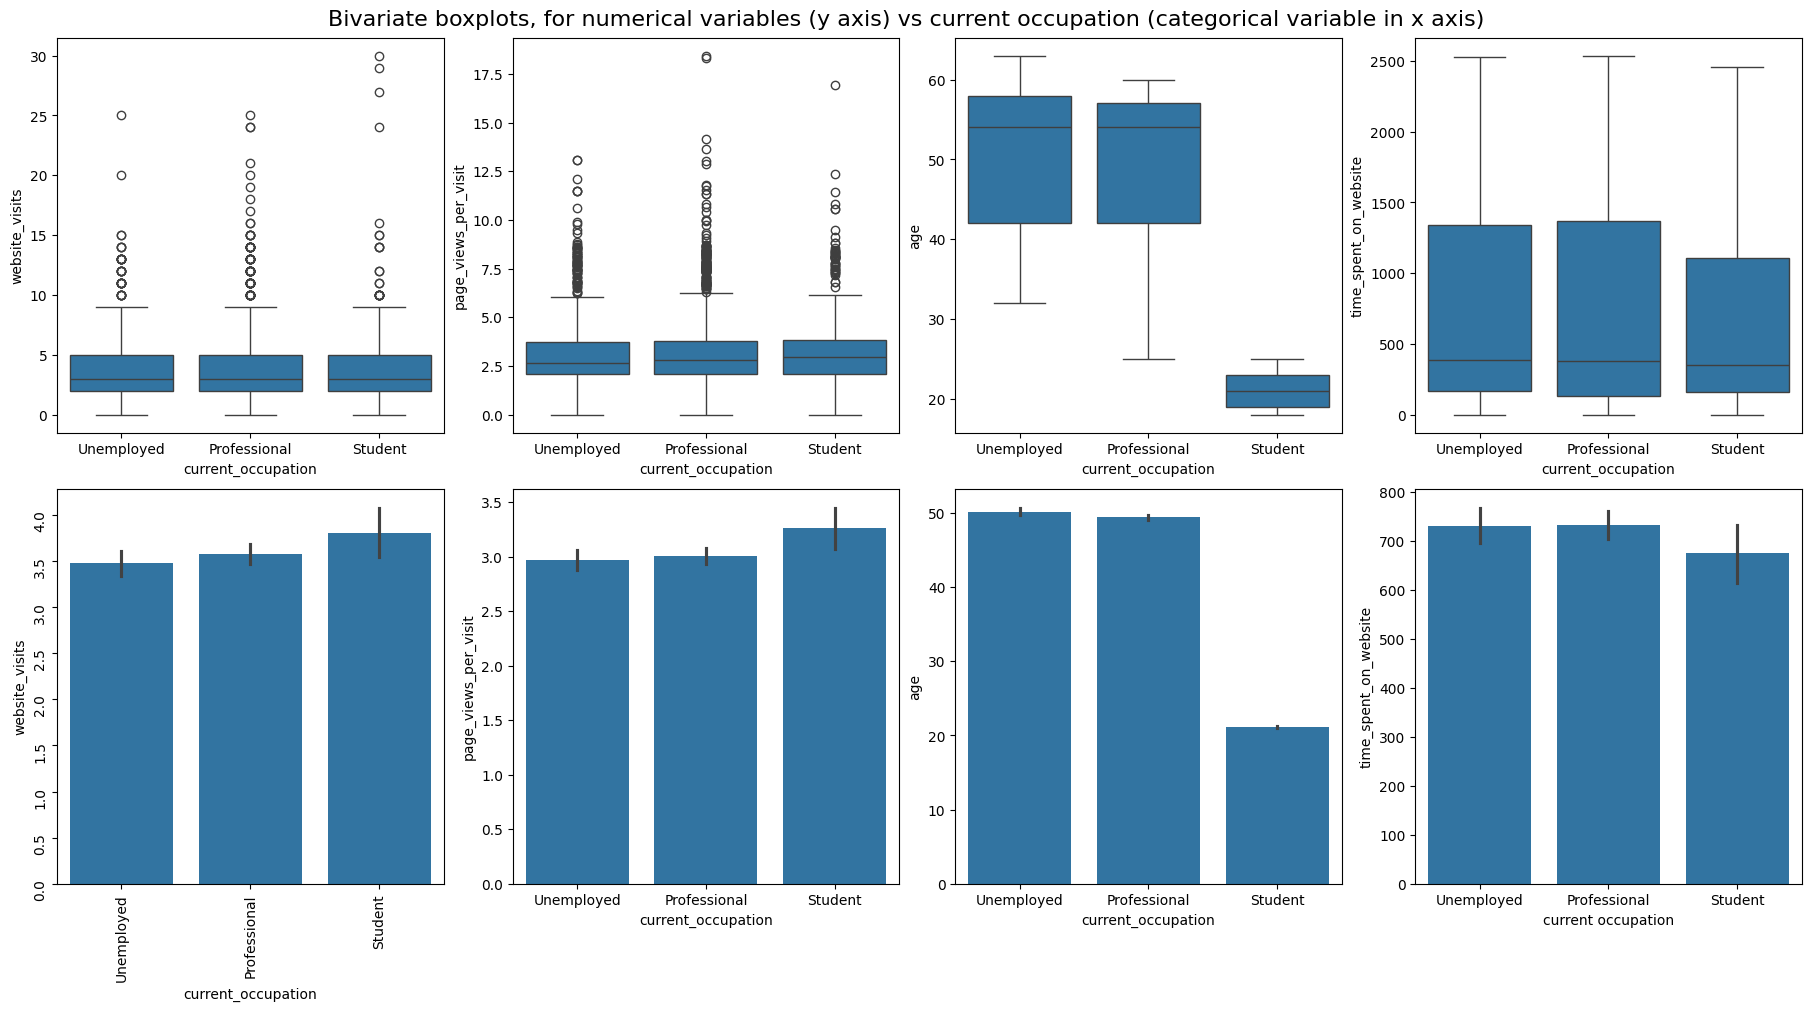

In [57]:
fig, axes = plt.subplots(2, 4, sharex=False, constrained_layout=True, figsize=(18,10))#(16,8)
fig.suptitle('Bivariate boxplots, for numerical variables (y axis) vs current occupation (categorical variable in x axis)', fontsize=16)

sns.boxplot(ax=axes[0, 0],data=df, x='current_occupation', y='website_visits') ;
#plt.title('Boxplot: web site visits, according to current occupation')
#plt.xlim(30,300)
plt.xlabel('current occupation')
plt.ylabel('web site visits')
sns.axes_style('whitegrid')
plt.xticks(rotation=90)

sns.boxplot(ax=axes[0, 1],data=df, x='current_occupation', y='page_views_per_visit') ;
plt.xlabel('current occupation')
plt.ylabel('page views per visit')
sns.axes_style('whitegrid')
plt.xticks(rotation=90)

sns.boxplot(ax=axes[0,2],data=df, x='current_occupation', y='age') ;
#plt.title('Boxplot: age, according to current occupation')
#plt.xlim(30,300)
plt.xlabel('current occupation')
plt.ylabel('age')
sns.axes_style('whitegrid')
plt.xticks(rotation=90)

sns.boxplot(ax=axes[0,3],data=df, x='current_occupation', y='time_spent_on_website') ;
plt.xlabel('current occupation')
plt.ylabel('time_spent_on_website')
sns.axes_style('whitegrid')
plt.xticks(rotation=0)
#
#Barplots for the same variables:
sns.barplot(x='current_occupation', y = 'website_visits', data = df, ax = axes[1,0])
axes[1,0].tick_params(rotation=90)#xticks(rotation=90)
#axes[1,0].set_title('Delivery time vs day of the week')

sns.barplot(x='current_occupation', y = 'page_views_per_visit', data = df, ax = axes[1,1])

sns.barplot(x='current_occupation', y = 'age', data = df, ax = axes[1,2])

sns.barplot(x='current_occupation', y = 'time_spent_on_website', data = df, ax = axes[1,3])

#sns.barplot(x='day_of_the_week', y = 'delivery_time', data = df, ax = axes[0,0])
#axes[0,0].tick_params(rotation=90)#xticks(rotation=90)
#axes[0,0].set_title('Delivery time vs day of the week')

**Observations:**

- The numerical variable exhibiting the strongest dependence with current occupation is age: the dependence of age with respect to current occupation is strong, whereas the dependence of the other variables (count of website visits and count of page_views_per_visit) is quite weak.  
- The age depends on the current occupation: the medium age for students
is approximately 20 years; and the medium age for unemployed and for professionals is approximately 54 years.

**Pairplots:**

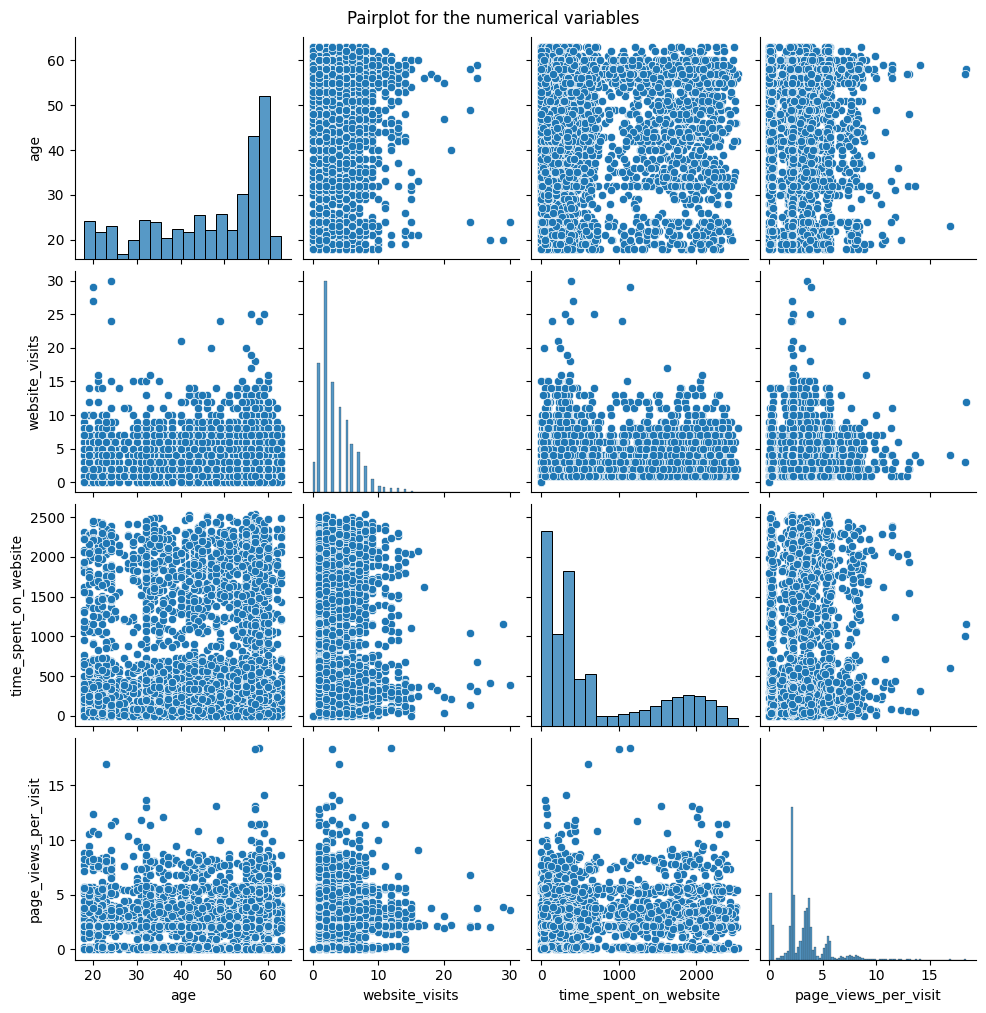

In [58]:
pair_plot = sns.pairplot(data=df[['age','website_visits','time_spent_on_website','page_views_per_visit']], palette='bright')
#pair_plot = sns.pairplot(data=df, vars = ['rating','delivery_time','food_preparation_time','cost_of_the_order'], palette='bright')#, height=2.2, aspect=1.5)

pair_plot.fig.suptitle('Pairplot for the numerical variables', y=1.01)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

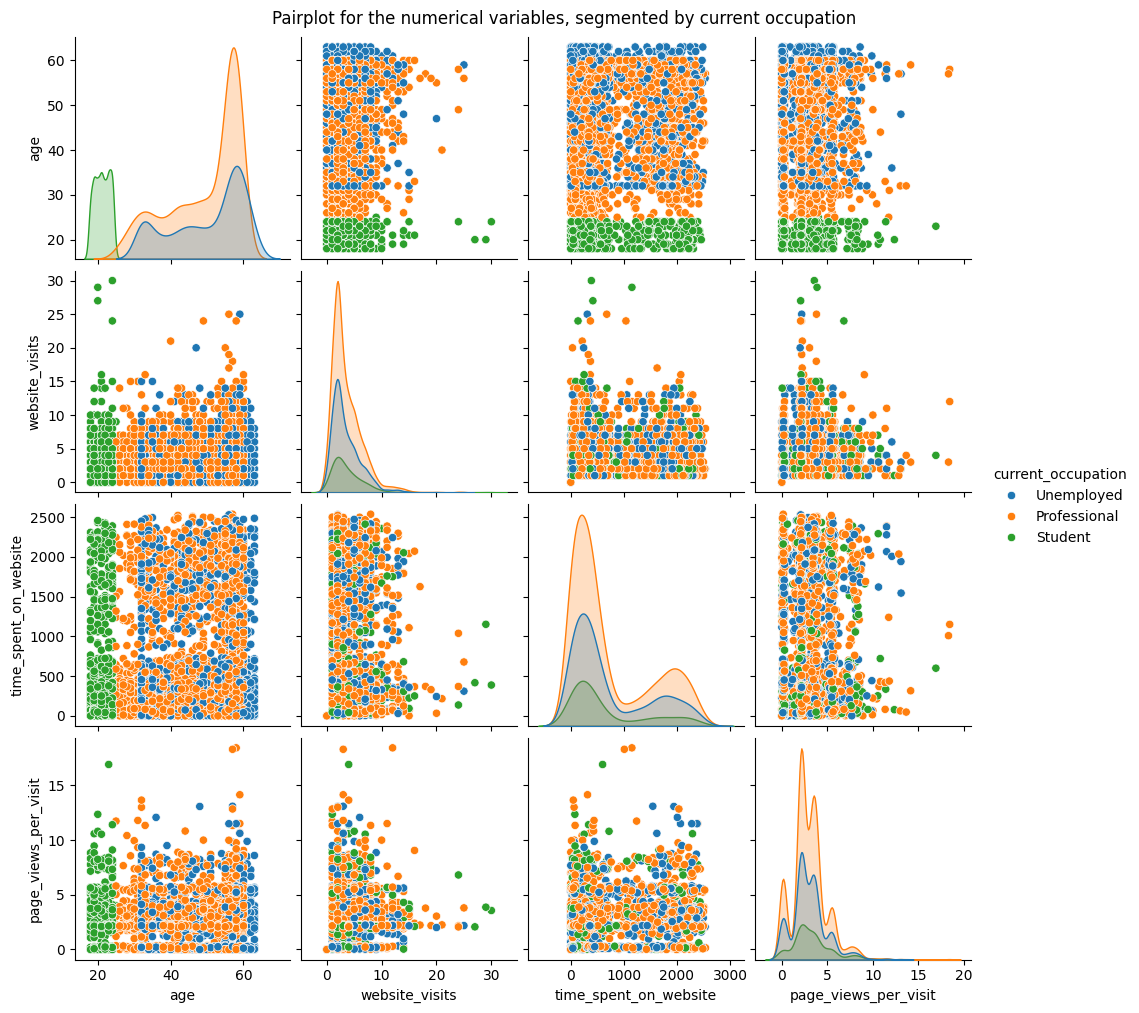

In [31]:
pair_plot2 = sns.pairplot(data=df, vars=['age','website_visits','time_spent_on_website','page_views_per_visit'], hue='current_occupation');

pair_plot2.fig.suptitle('Pairplot for the numerical variables, segmented by current occupation', y=1.01)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Heatmaps:**

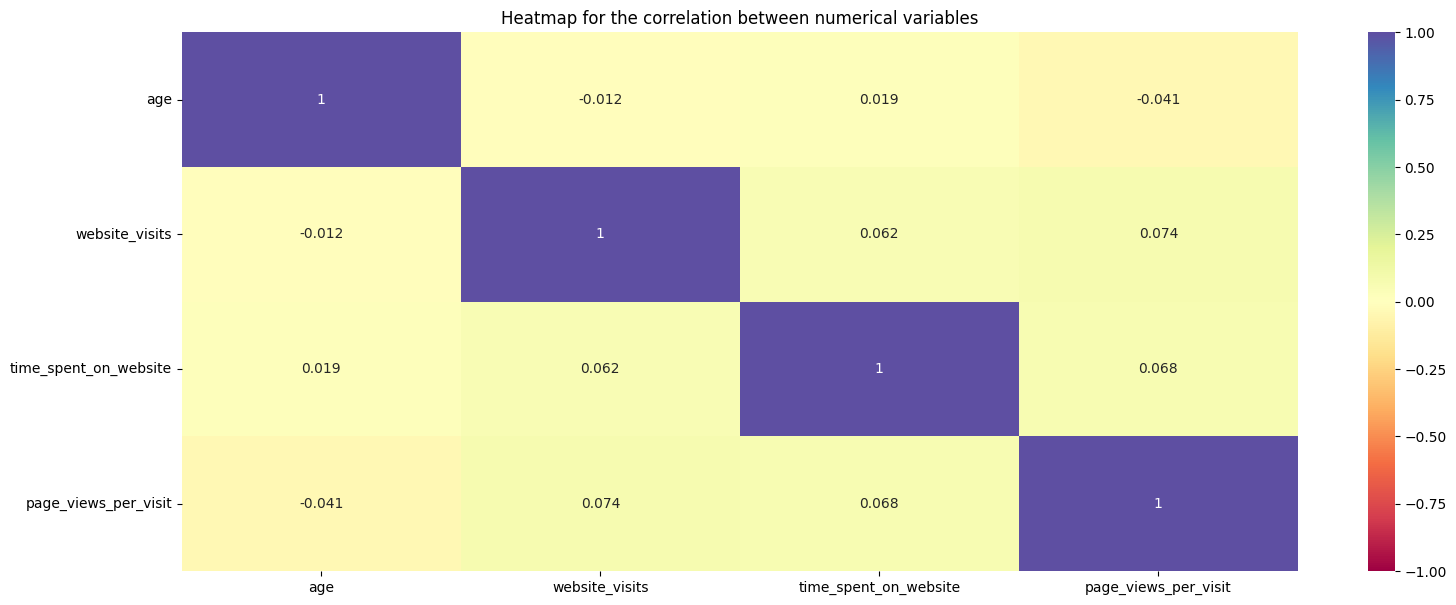

In [32]:
plt.figure(figsize = (18, 7)) # To resize the plot

heatmap1 = sns.heatmap(df[['age','website_visits','time_spent_on_website','page_views_per_visit']].corr(), annot = True, cmap = 'Spectral', vmin = -1, vmax = 1)

plt.title("Heatmap for the correlation between numerical variables")
plt.show()

#heatmap1.suptitle('Heatmap for the numerical variables', y=1.01)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#'age','website_visits','time_spent_on_website','page_views_per_visit'

**Observations from the pairplots and correlation heatmap:**
- The correlation between the features
'age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit' is very weak. \
Therefore, there is not need to eliminate any of them.
- In the pairplot, there are not any clear relationships.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#Observation:
- Decision trees and random forests are not sensitive to the magnitude of variables, so that scaling is not necessary. Then, we don't perform scaling.

**Outlier detection:**

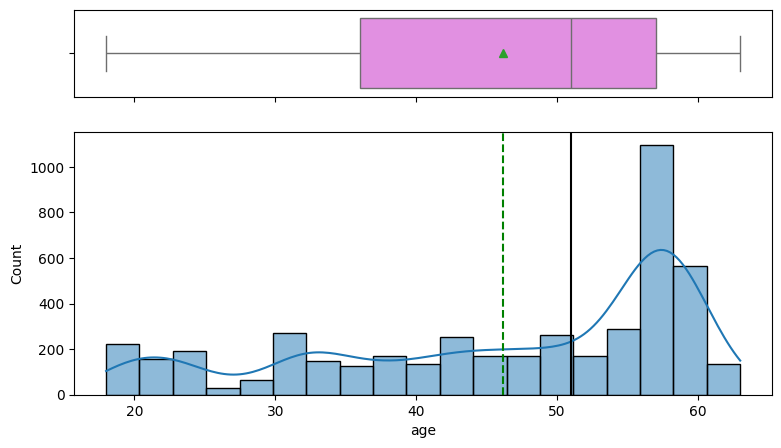

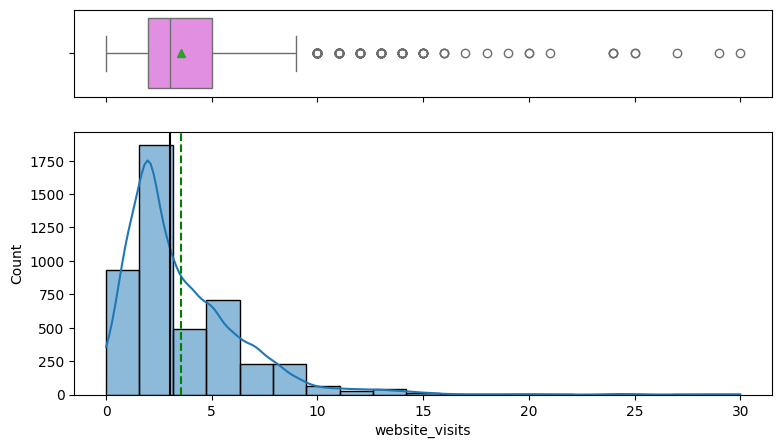

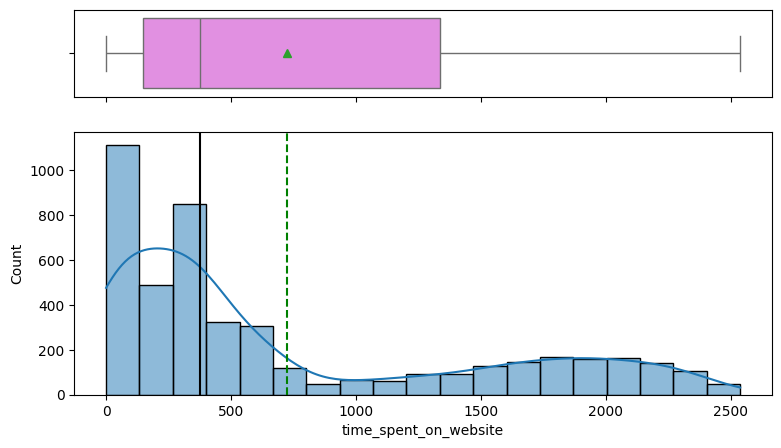

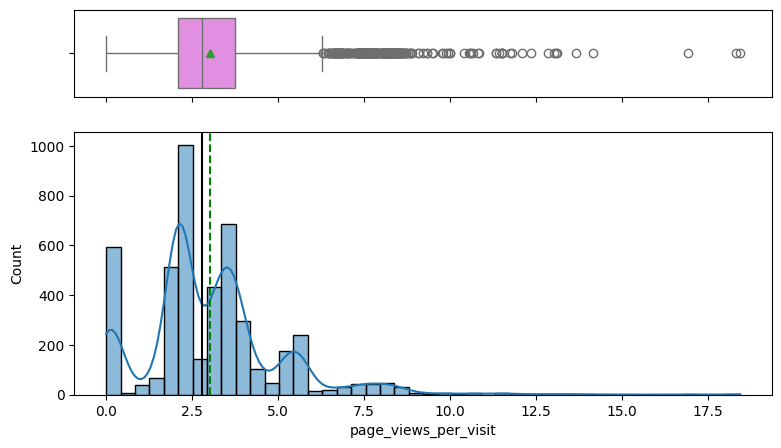

In [59]:
histogram_boxplot(df, "age", kde = True, bins = 19)

histogram_boxplot(df, "website_visits", kde = True, bins = 19)

histogram_boxplot(df, "time_spent_on_website", kde = True, bins = 19)

histogram_boxplot(df, "page_views_per_visit", kde = True, bins = 44)

**Observations from the histograms and boxplots:**

From the numerical variables (age, website_visits, time_spent_on_website, page_views_per_visit), only website_visits and page_views_per_visit have outiers:
- website_visits has outliers on the right hand side: few leads have an overhigh number of visits to the website, higher than 9.
- page_views_per_visit has outliers on the right hand side:
 few leads have an overhigh number of views per visit, higher than 7.0.

**Nonlinear transformation of features by using log**\

In [34]:
def funlogi(s):
    return np.log(s+0.1)

<Axes: xlabel='Log(page_views_per_visit)', ylabel='Density'>

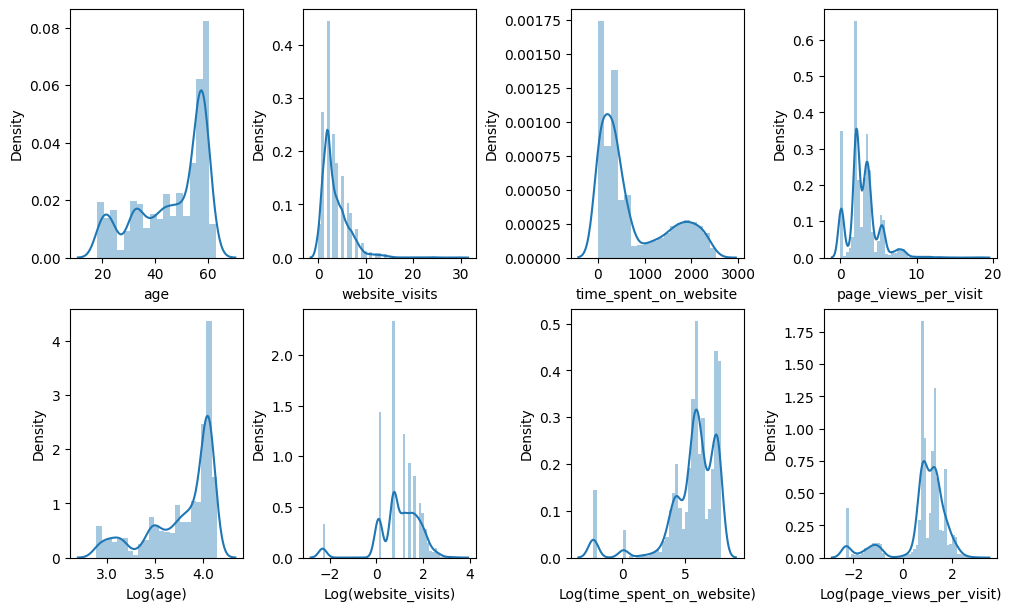

In [60]:
fig, axes = plt.subplots(2, 4, sharex=False, constrained_layout=True, figsize=(10,6))#(16,8)

sns.distplot(df['age'], axlabel = 'age', ax=axes[0, 0]) #sns.distplot(np.log(df['age']), axlabel = 'Log(age)', ax=axes[0, 1])
df['logi_age'] = np.log(df['age'])
sns.distplot(df['logi_age'], axlabel = 'Log(age)', ax=axes[1, 0])

sns.distplot(df['website_visits'], axlabel = 'website_visits', ax=axes[0, 1])
df['logi_website_visits'] = df['website_visits'].apply(funlogi)
sns.distplot(df['logi_website_visits'], axlabel = 'Log(website_visits)', ax=axes[1, 1])

sns.distplot(df['time_spent_on_website'], axlabel = 'time_spent_on_website', ax=axes[0, 2])
df['logi_time_spent_on_website'] = df['time_spent_on_website'].apply(funlogi)
sns.distplot(df['logi_time_spent_on_website'], axlabel = 'Log(time_spent_on_website)', ax=axes[1, 2])

sns.distplot(df['page_views_per_visit'], axlabel = 'page_views_per_visit', ax=axes[0, 3])
df['logi_page_views_per_visit'] = df['page_views_per_visit'].apply(funlogi)
sns.distplot(df['logi_page_views_per_visit'],axlabel = 'Log(page_views_per_visit)', ax=axes[1, 3])

**Observations:**
- I will not use nonlinear transformation of variables, because the models (decision tree and random forest) have achieved a good performance without nonlinear transformation.
- However, the remainder of the nonlinear transformation analysis is provided in the Appendix section at the end.

**Dropping unnecessary columns** \
- We have the new features: logi_age, logi_website_visits, logi_time_spent_on_website, logi_page_views_per_visit
- We need to get rid of them, and also we need to get rid of the ID column.

In [61]:
df.head()

ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   
3  Website Activity                No                No            No   
4    Email Activity                No                No            No   

  educational_channels referral  status  logi_age  logi_website_visits  \
0                   No       No       1  4.043051             1.960095   
1                  Yes       No       0  4.025352             0.741937   
2                   No       No       0  3.951244             1.131402   
3                   No       No       1  3.970292             1.410987   
4                   No       No       0  3.135494             1.410987   

   logi_time_spent_on_website  logi_page_views_per_visit  
0                    7.401903                   0.673455  
1                    4.420045                  -0.867501  
2                    5.799396                  -1.748700  
3                    6.140100                   0.768718  
4                    6.397096                   2.834037

In [62]:
df_forModel = df.copy() #Esto crea una copia
df_forModel.head()

ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   
3  Website Activity                No                No            No   
4    Email Activity                No                No            No   

  educational_channels referral  status  logi_age  logi_website_visits  \
0                   No       No       1  4.043051             1.960095   
1                  Yes       No       0  4.025352             0.741937   
2                   No       No       0  3.951244             1.131402   
3                   No       No       1  3.970292             1.410987   
4                   No       No       0  3.135494             1.410987   

   logi_time_spent_on_website  logi_page_views_per_visit  
0                    7.401903                   0.673455  
1                    4.420045                  -0.867501  
2                    5.799396                  -1.748700  
3                    6.140100                   0.768718  
4                    6.397096                   2.834037

In [63]:
df_forModel.drop(['ID','logi_age','logi_website_visits','logi_time_spent_on_website','logi_page_views_per_visit'], axis=1, inplace=True)

df_forModel.head()

age current_occupation first_interaction profile_completed  website_visits  \
0   57         Unemployed           Website              High               7   
1   56       Professional        Mobile App            Medium               2   
2   52       Professional           Website            Medium               3   
3   53         Unemployed           Website              High               4   
4   23            Student           Website              High               4   

   time_spent_on_website  page_views_per_visit     last_activity  \
0                   1639                 1.861  Website Activity   
1                     83                 0.320  Website Activity   
2                    330                 0.074  Website Activity   
3                    464                 2.057  Website Activity   
4                    600                16.914    Email Activity   

  print_media_type1 print_media_type2 digital_media educational_channels  \
0               Yes                No           Yes                   No   
1                No                No            No                  Yes   
2                No                No           Yes                   No   
3                No                No            No                   No   
4                No                No            No                   No   

  referral  status  
0       No       1  
1       No       0  
2       No       0  
3       No       1  
4       No       0

**Examination of data after data manipulation**

- It is convenient to explore the data once again after manipulating it.

In [64]:
df_forModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [65]:
df_forModel.isna().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [66]:
df_forModel[num_cols].describe(include='all').T

count        mean         std   min        25%  \
age                    4612.0   46.201214   13.161454  18.0   36.00000   
website_visits         4612.0    3.566782    2.829134   0.0    2.00000   
time_spent_on_website  4612.0  724.011275  743.828683   0.0  148.75000   
page_views_per_visit   4612.0    3.026126    1.968125   0.0    2.07775   

                           50%         75%       max  
age                     51.000    57.00000    63.000  
website_visits           3.000     5.00000    30.000  
time_spent_on_website  376.000  1336.75000  2537.000  
page_views_per_visit     2.792     3.75625    18.434

In [67]:
description_cat = df_forModel[cat_cols].describe(include='all').loc[['count','unique']]
print(description_cat.T)

                       count unique
status                4612.0    NaN
current_occupation      4612      3
first_interaction       4612      2
profile_completed       4612      3
last_activity           4612      3
print_media_type1       4612      2
print_media_type2       4612      2
digital_media           4612      2
educational_channels    4612      2
referral                4612      2


In [68]:
df_forModel[cat_cols].nunique()

status                  2
current_occupation      3
first_interaction       2
profile_completed       3
last_activity           3
print_media_type1       2
print_media_type2       2
digital_media           2
educational_channels    2
referral                2
dtype: int64

**Creating Dummy variables for the categorical columns:** \
 drop_first=True is used to avoid redundant variables

In [69]:
NewdfDummies = pd.get_dummies(
    df_forModel,
    columns = df_forModel.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

## Creating dummy variables for the categorical columns
## drop_first=True is used to avoid redundant variables

In [70]:
NewdfDummies.head()

age  website_visits  time_spent_on_website  page_views_per_visit  status  \
0   57               7                   1639                 1.861       1   
1   56               2                     83                 0.320       0   
2   52               3                    330                 0.074       0   
3   53               4                    464                 2.057       1   
4   23               4                    600                16.914       0   

   current_occupation_Student  current_occupation_Unemployed  \
0                       False                           True   
1                       False                          False   
2                       False                          False   
3                       False                           True   
4                        True                          False   

   first_interaction_Website  profile_completed_Low  profile_completed_Medium  \
0                       True                  False                     False   
1                      False                  False                      True   
2                       True                  False                      True   
3                       True                  False                     False   
4                       True                  False                     False   

   last_activity_Phone Activity  last_activity_Website Activity  \
0                         False                            True   
1                         False                            True   
2                         False                            True   
3                         False                            True   
4                         False                           False   

   print_media_type1_Yes  print_media_type2_Yes  digital_media_Yes  \
0                   True                  False               True   
1                  False                  False              False   
2                  False                  False               True   
3                  False                  False              False   
4                  False                  False              False   

   educational_channels_Yes  referral_Yes  
0                     False         False  
1                      True         False  
2                     False         False  
3                     False         False  
4                     False         False

**Separating independent variables and the target variable:**

In [71]:
Y = NewdfDummies['status']
X = NewdfDummies.drop(columns = ["status"], axis=1)

In [72]:
X.head()

age  website_visits  time_spent_on_website  page_views_per_visit  \
0   57               7                   1639                 1.861   
1   56               2                     83                 0.320   
2   52               3                    330                 0.074   
3   53               4                    464                 2.057   
4   23               4                    600                16.914   

   current_occupation_Student  current_occupation_Unemployed  \
0                       False                           True   
1                       False                          False   
2                       False                          False   
3                       False                           True   
4                        True                          False   

   first_interaction_Website  profile_completed_Low  profile_completed_Medium  \
0                       True                  False                     False   
1                      False                  False                      True   
2                       True                  False                      True   
3                       True                  False                     False   
4                       True                  False                     False   

   last_activity_Phone Activity  last_activity_Website Activity  \
0                         False                            True   
1                         False                            True   
2                         False                            True   
3                         False                            True   
4                         False                           False   

   print_media_type1_Yes  print_media_type2_Yes  digital_media_Yes  \
0                   True                  False               True   
1                  False                  False              False   
2                  False                  False               True   
3                  False                  False              False   
4                  False                  False              False   

   educational_channels_Yes  referral_Yes  
0                     False         False  
1                      True         False  
2                     False         False  
3                     False         False  
4                     False         False

In [73]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: status, dtype: int64

In [74]:
Y.tail()

4607    0
4608    0
4609    1
4610    0
4611    0
Name: status, dtype: int64

In [75]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4612 entries, 0 to 4611
Series name: status
Non-Null Count  Dtype
--------------  -----
4612 non-null   int64
dtypes: int64(1)
memory usage: 36.2 KB


In [76]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   current_occupation_Student      4612 non-null   bool   
 5   current_occupation_Unemployed   4612 non-null   bool   
 6   first_interaction_Website       4612 non-null   bool   
 7   profile_completed_Low           4612 non-null   bool   
 8   profile_completed_Medium        4612 non-null   bool   
 9   last_activity_Phone Activity    4612 non-null   bool   
 10  last_activity_Website Activity  4612 non-null   bool   
 11  print_media_type1_Yes           4612 non-null   bool   
 12  print_media_type2_Yes           46

**Splitting the dataset into train and test datasets:**
we consider 20% of data for test

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 1)

In [78]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3689, 16)
Shape of test set :  (923, 16)


**Model evaluation criterion**

- We will use the confusion matrix for classification evaluation. It includes accuracy, precision and recall. To this end, we define the function 'metrics_score'.

In [79]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not', 'Yes'], yticklabels=['Not', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building a Decision Tree model**

- We will use the confusion matrix for classification evaluation. We use the function 'metrics_score' defined before.
- Decision trees and random forests are not sensitive to the magnitude of variables, so that scaling is not necessary. Then, we don't perform scaling.
- class_weight: I consider that accurate prediction is important for both paid customer (status = 1) and unpaid customer (status = 0). Then, I will not specify class_weight, so that the program gives equal weight to both paid customer and unpaid customer.
- In analizing the confusion matrix, I consider that both precision and recall are equally important.
- I will use the DecisionTreeClassifier function.

In [80]:
## **Decision Tree**
# Decision Tree Classifier:
dt_classifier = DecisionTreeClassifier(random_state = 1)
#dt_regressor = DecisionTreeRegressor(random_state = 1)

In [81]:
# Fitting the model
dt_classifier.fit(x_train, y_train)
dtclassifiervariable = dt_classifier.fit(x_train, y_train)
print('The depth of the tree is:',dtclassifiervariable.tree_.max_depth)
#dt_regressor.fit(x_train, y_train)

The depth of the tree is: 28


Now, we evaluate the model on the train set and on the test set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



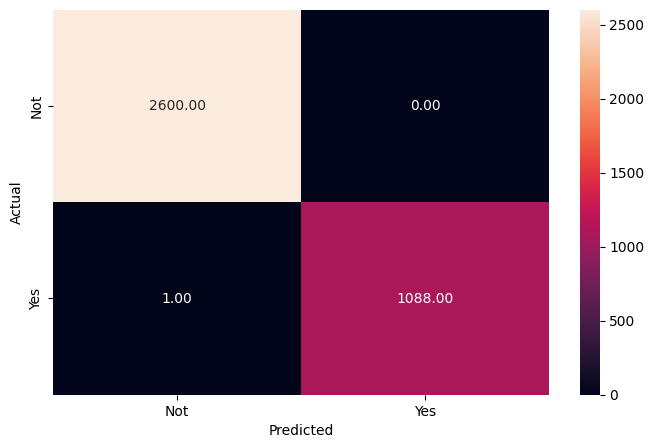

In [82]:
# Model Performance on the train data
y_pred_train_dt = dt_classifier.predict(x_train)
metrics_score(y_train, y_pred_train_dt)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       635
           1       0.71      0.70      0.71       288

    accuracy                           0.82       923
   macro avg       0.79      0.79      0.79       923
weighted avg       0.82      0.82      0.82       923



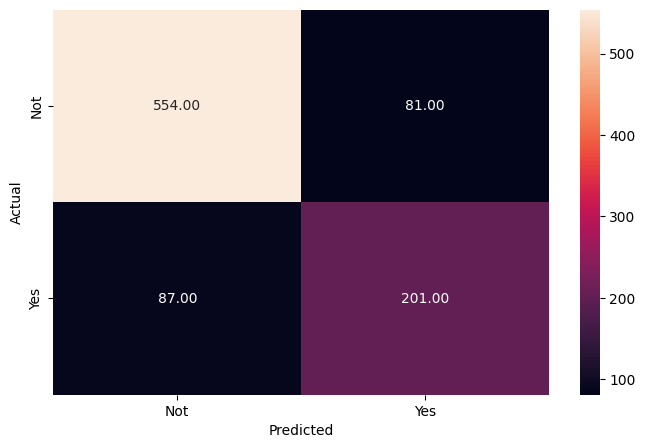

In [83]:
# Model Performance on the test data:
y_pred_test_dt = dt_classifier.predict(x_test)
metrics_score(y_test, y_pred_test_dt)

#dt_regressor_perf_train = model_performance_regression(dt_classifier, x_train, y_train)
##dt_regressor_perf_train = model_performance_regression(dt_regressor, x_train, y_train)
#print('The performance of the decision tree on the train dataset is:\n', dt_regressor_perf_train)

## Do we need to prune the tree?

# Observations:
 - B𝕪 comparing the accuracy between train and test data, one can see a precision-recall of 1-1 for train data, and of 0.71-0.70 for test data. It is a high difference, so that there is overfitting.
 - Then, we are going to prune the tree.

Now, we limit the max_depth of the tree in order to reduce overfitting:

In [84]:
dt_classifier_pruned = DecisionTreeClassifier(random_state = 1, max_depth =10)

dt_classifier_pruned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

Metrics of pruned (limited mx depth) decision tree for training data:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2600
           1       0.87      0.87      0.87      1089

    accuracy                           0.92      3689
   macro avg       0.91      0.91      0.91      3689
weighted avg       0.92      0.92      0.92      3689



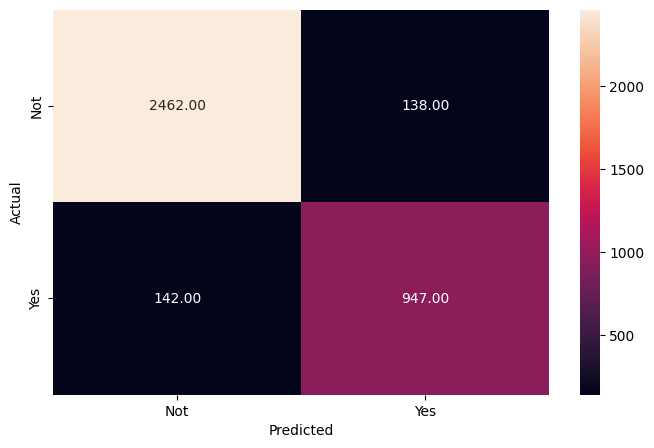

In [85]:
y_pred_train_dt_pruned = dt_classifier_pruned.predict(x_train)
metrics_score(y_train, y_pred_train_dt_pruned)

#dt_regressor_pruned_perf_train = model_performance_regression(dt_classifier_pruned, x_train, y_train)
#print('Decision tree performance on the train dataset is: \n', dt_regressor_pruned_perf_train)

Metrics of pruned (limited mx depth) decision tree for test data:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       635
           1       0.75      0.75      0.75       288

    accuracy                           0.85       923
   macro avg       0.82      0.82      0.82       923
weighted avg       0.84      0.85      0.84       923



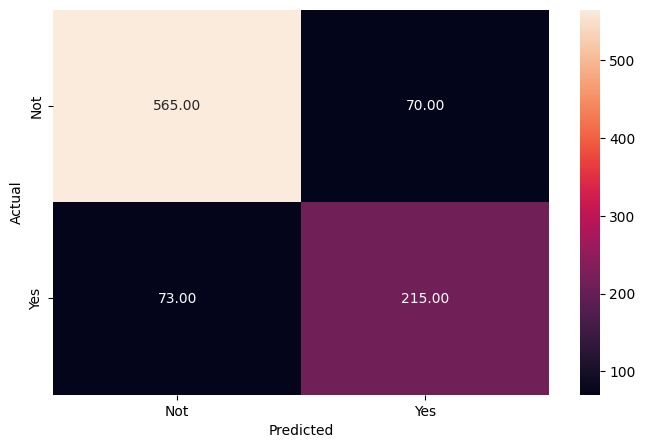

In [86]:
y_pred_test_dt_pruned = dt_classifier_pruned.predict(x_test)
metrics_score(y_test, y_pred_test_dt_pruned)

# Observation:
- We can see that as a result of limiting the max_depth to 10,\
we obtain a lower differene between train and test:\
   -precision-recall for train data: 0.87-0.87 \
   -precision-recall for test data: 0.75-0.75 \
- These values are relatively closer, so that the used limitation of max_depth was useful to certain level.
- However, we will later use random forest and the corresponding tuning, as these are better ways to avoid ovefitting.

# Plot the feature importance:

<Axes: xlabel='Importance', ylabel='None'>

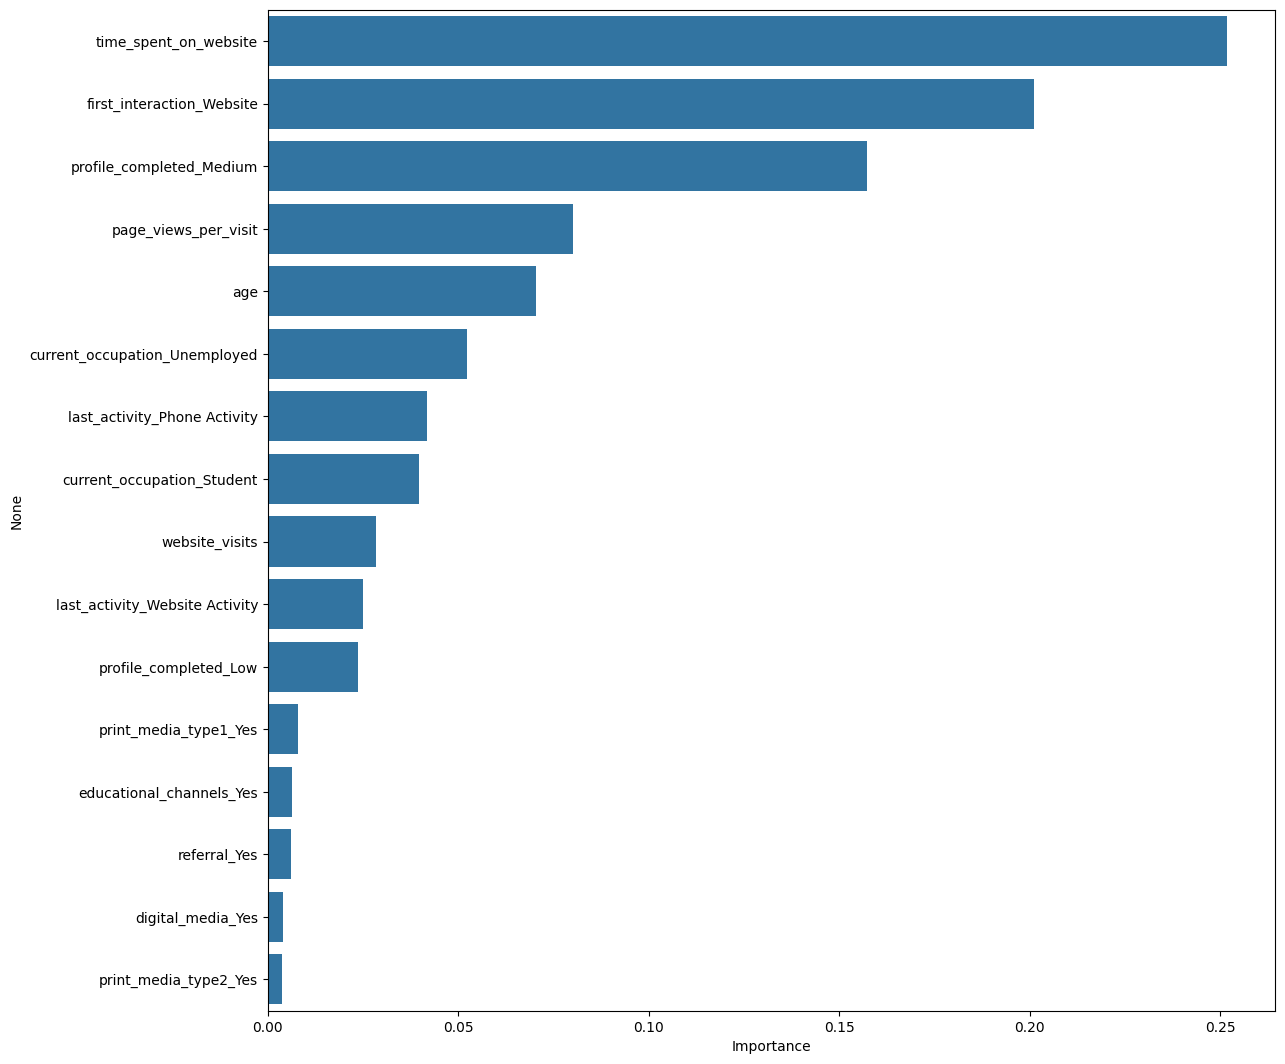

In [87]:
importances = dt_classifier_pruned.feature_importances_
columns = X.columns
#print(columns)
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**
- According to the Decision tree, time_spent_on_website is the most important feature, followed by first_interaction_Website, profile_completed_Medium, page_views_per_visit, age.
- This might signify that the leads with higher possibility of becoming paid custormer, spend more time on website, their first interaction is through website, have a Medium level of profile completion, and certain age range.

**Plotting of the decision tree:**\
we are only visualizing the tree up to max_depth = 4.

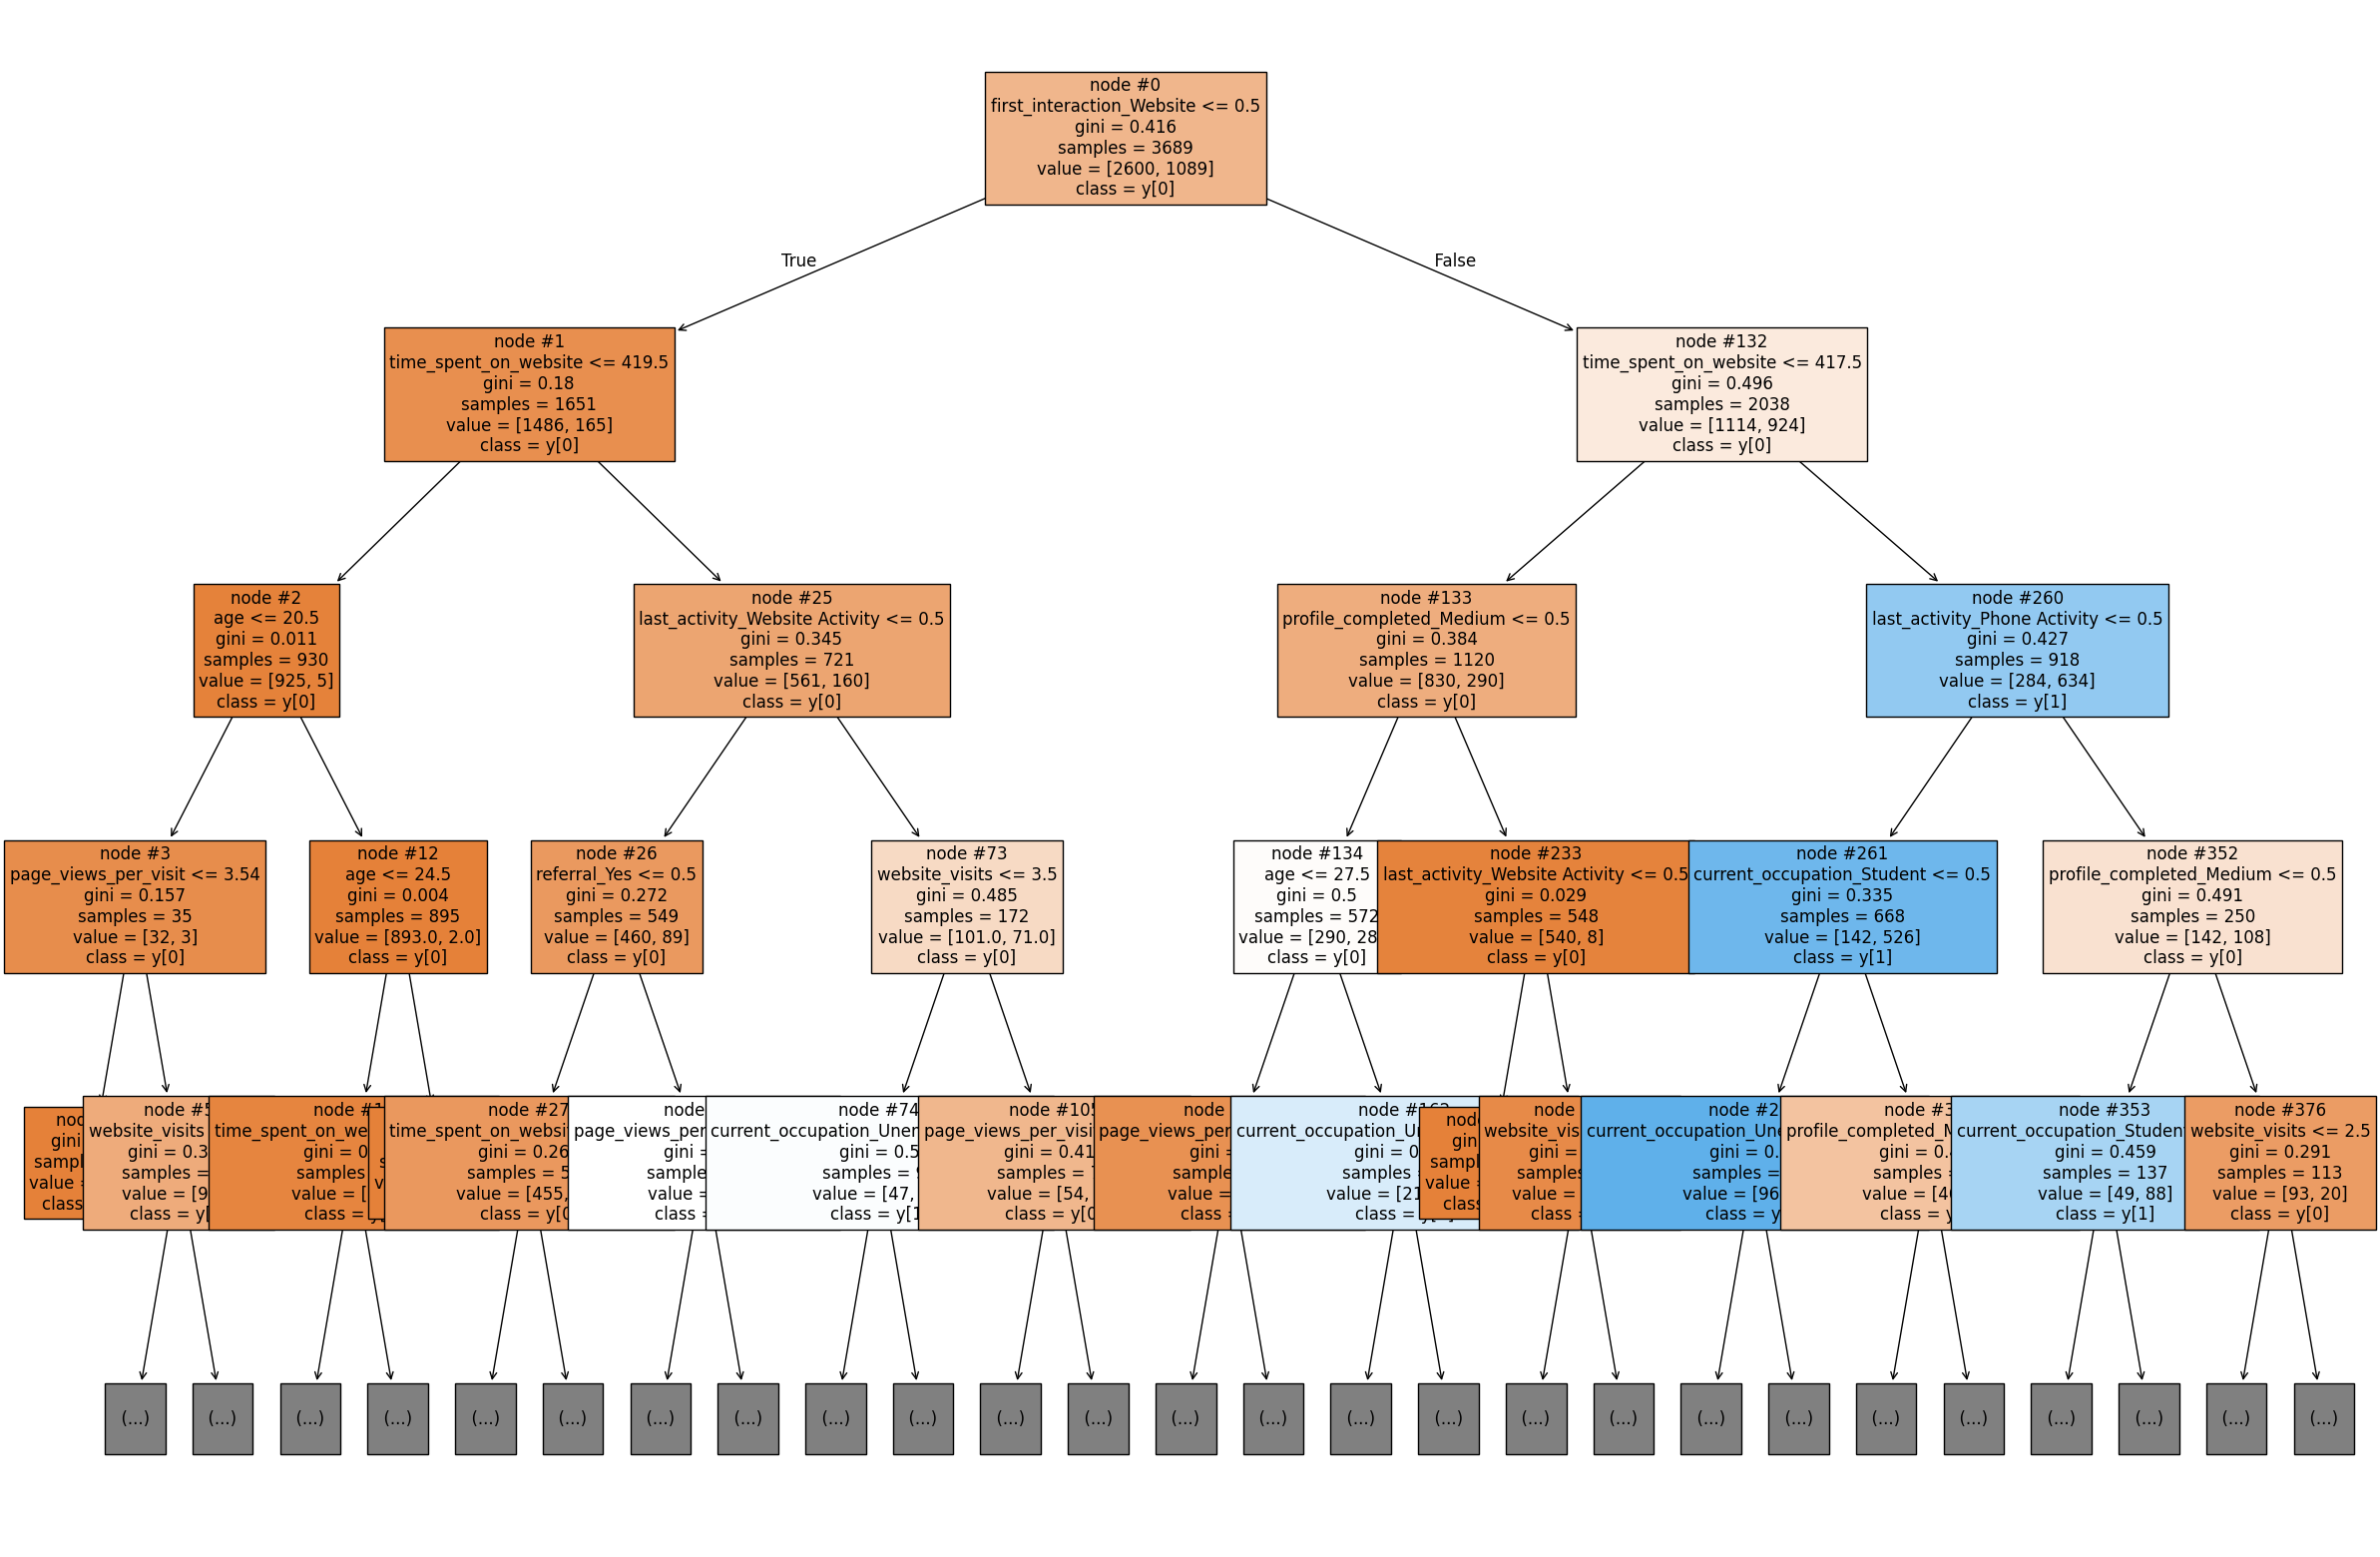

In [88]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt_classifier_pruned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [ ]:
#print(tree.export_text(dt_classifier_pruned, feature_names=x_train.columns.tolist(), show_weights=True))

**Observations:**
- The decision tree starts with a split on first_interaction_website and follows with time_spent_on_website.

## Building a Random Forest model

In [89]:
# Random Forest Regressor
rf_regressor = RandomForestClassifier(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

Metrics of random forest on train data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



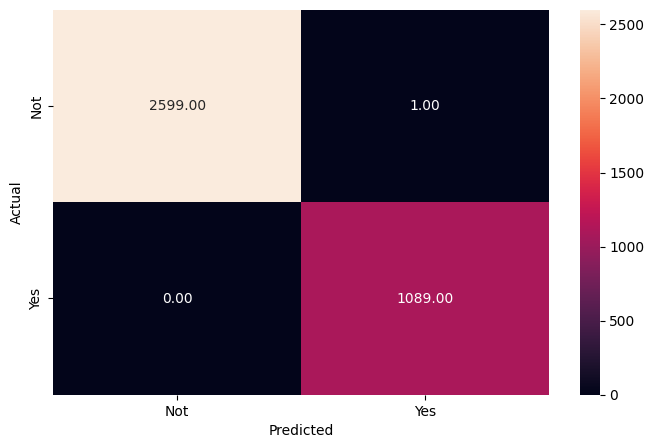

In [90]:
y_pred_train_rf = rf_regressor.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

## Model Performance on the train data
#rf_regressor_perf_train = model_performance_regression(rf_regressor, x_train, y_train)
#print('The performance of the Random Forest on the train data is: \n',  rf_regressor_perf_train)

Metrics of random forest on test data:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       635
           1       0.83      0.74      0.78       288

    accuracy                           0.87       923
   macro avg       0.86      0.83      0.84       923
weighted avg       0.87      0.87      0.87       923



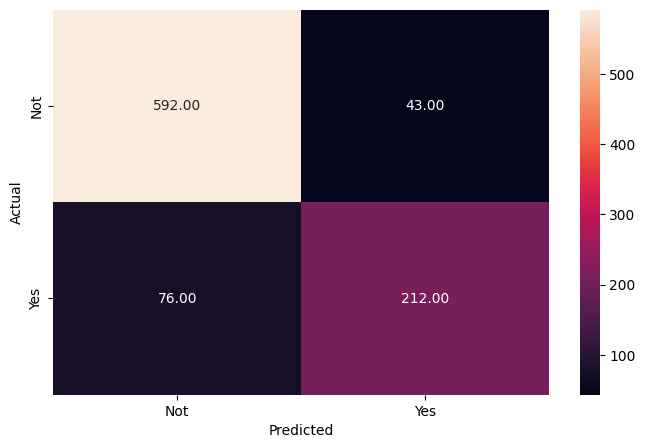

In [91]:
y_pred_test_rf = rf_regressor.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

**Do we need to prune the random forest?**

**Observations:**
- We can see that:\
  - precision-recall for train data: 1-1 \
  - precision-recall for test data: 0.83-0.74 \
- The difference between these train and test results is relatively high, so that **there is overfitting**.
- Then, we need to tune the random forest.

### **Tuning of the Random Forest Classifier**

**Note:**  we will optimize the parameters:\
- max_depth = max number of levels in each decision tree \
- max_features = max number of features considered for splitting a node \
- n_estimators = number of trees in the foreset \

Running the code below takes some time.

In [92]:
rf_tuned = RandomForestClassifier(random_state = 1)

# Grid of parameters to choose from
rf_parameters = {"n_estimators": [100, 110, 120],

    "max_depth": [5, 7, 15, 20, 30, 50],

    "max_features": [0.8, 1, 2]
             }

# Run the grid search
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv = 5)

rf_grid_obj = rf_grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = rf_grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=0.8, random_state=1)

**Metrics of tuned random forest on training data:**

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2600
           1       0.84      0.78      0.81      1089

    accuracy                           0.89      3689
   macro avg       0.88      0.86      0.87      3689
weighted avg       0.89      0.89      0.89      3689



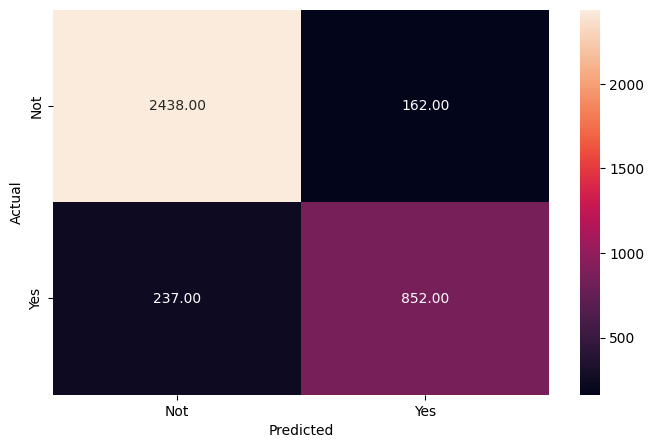

In [93]:
# Model Performance on the train data:
y_pred_train_rf_tuned = rf_tuned_regressor.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

**Metrics of tuned random forest on test data:**

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       635
           1       0.83      0.73      0.78       288

    accuracy                           0.87       923
   macro avg       0.86      0.83      0.84       923
weighted avg       0.87      0.87      0.87       923



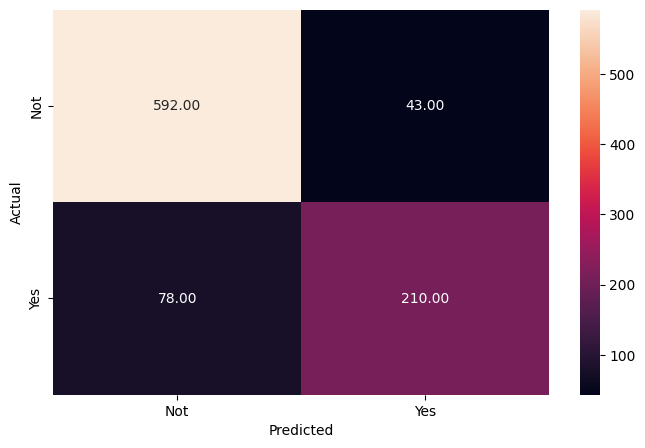

In [94]:
# Model Performance on the test data:
y_pred_test_rf_tuned = rf_tuned_regressor.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [95]:
print('The best parameters from fitting the random search are:', rf_grid_obj.best_params_)

The best parameters from fitting the random search are: {'max_depth': 7, 'max_features': 0.8, 'n_estimators': 100}


# Observations:
- We can see that:\
  - precision-recall for train data: 0.84-0.78 \
  - precision-recall for test data: 0.83-0.73 \
- The difference between these train and test results is quite low, so that there is not overfitting.
- The tuning of the random forest has resulted in metrics (accuracy, precision, recall) with quite small difference between train and test data. Therefore, **the issue of overfitting has been solved**.
- **The best parameters from fitting the random search are: max_depth: 7, max_features: 0.8, n_estimators: 100**.   



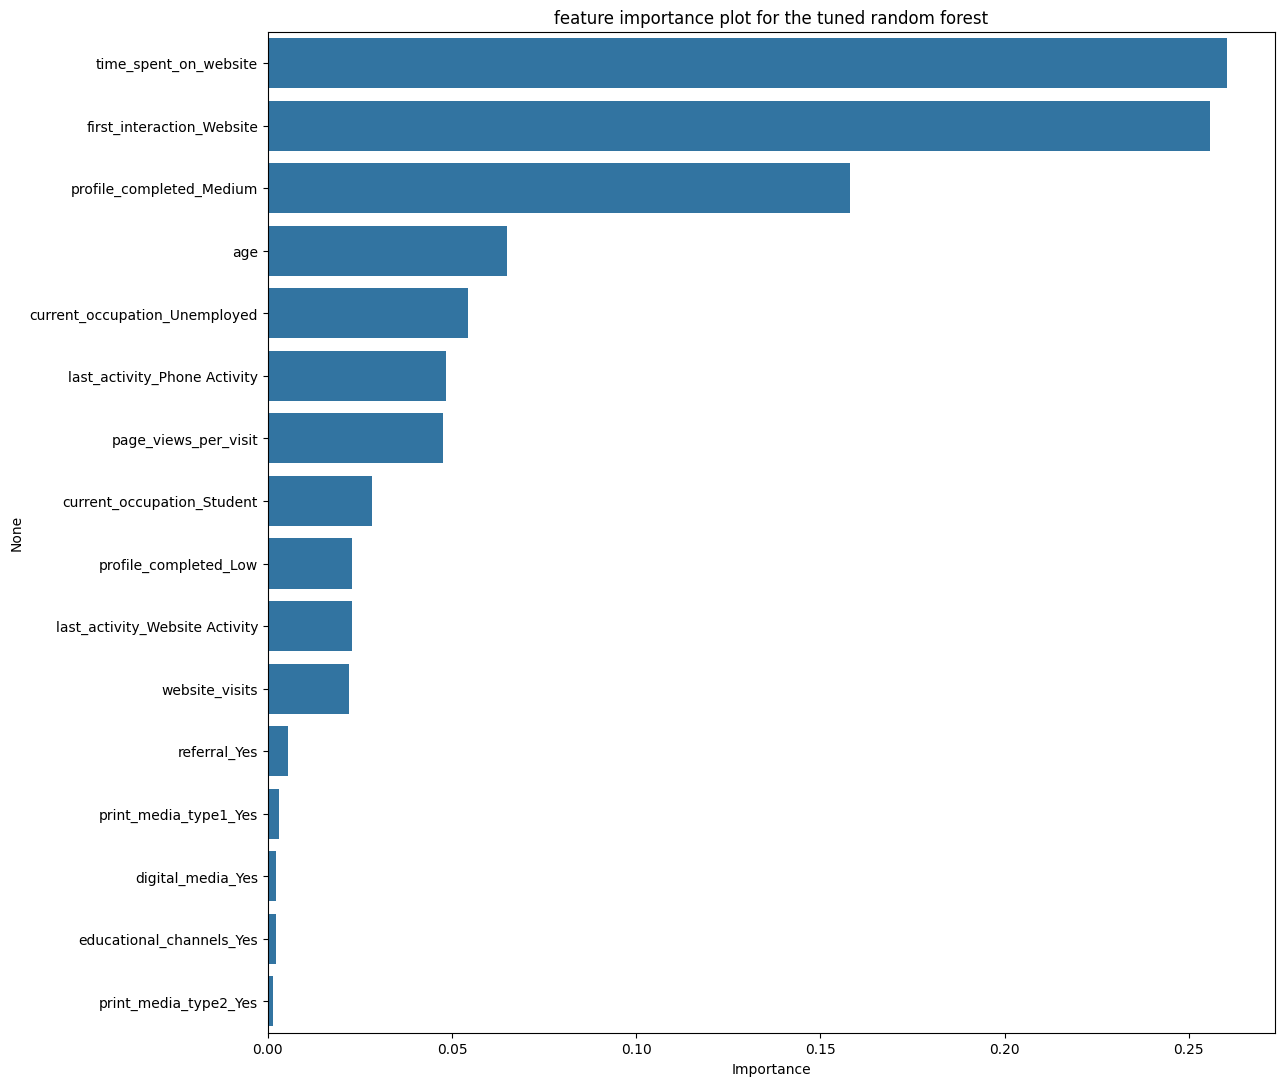

In [96]:
importances = rf_tuned_regressor.feature_importances_
columns = X.columns
#print(columns)
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.title("feature importance plot for the tuned random forest")
plt.show()

# Observations
- **The feature importance plot for the initial model (pruned decision tree) and that for tuned model (tuned random forest) are quite similar.** The models indicates that 'time_spent_on_website', 'first_interaction_Website', 'profile_completed_Medium', 'age', 'current_occupation_Unemployed' are the five most important features.
- The main difference between the initial model (pruned decision tree) and tuned model (tuned random forest), is that 'page_views_per_visit' is not among the five most important features in the tuned random forest.
-In addition, 'referral_Yes', 'educational_channels_Yes', 'print_media_type1_Yes', 'print_media_type2_Yes' have a low importance.
-We can say that leads with higher likelyhood to become paid customers are characterized by: spend more time on website, their first interaction is through website, have a High level of profile completion; they are older, and their current occupation is professional.
- The channels (print_media_type1, print_media_type2, digital_media,
  educational_channels, referral) have a low importance in the achievement of paid customers. Also, referral is the channel with higher importance.  

## Actionable Insights and Recommendations
#Conclusions
- We have utilized the decision tree, pruned decision tree,
random forest and tuned random forest.
- The tuning of random forest resulted in avoidance if overfitting.
- The obtained values of precision and recall compared between train and test are very similar, with a precision of 0.83-0.84 and a recall of 0.73-0.78.
- We have identified the key factors involved in the conversion of leads to paid customers, by means of the 'feature importance' diagram.
- It is possible to improve the tuning by including other parameters in the optimization, and by modifying the parameter values used as possible values in the optimization.

#Recommendations:
- The variables 'time_spent_on_website' and 'first_interaction_Website' are
the most important ones for identifying which leads are more likely to convert to paid customers.  
- Then, to improve the conversion of unpaid to paind customers, the ExtraaLearn company should focus on: i) increasing the advertising that motivates people to interact through the website, rather than email or phone; ii) reviewing the website (the information that is given to the readers) and improving it if possible, as it results in higher conversion rate.   
- The variables 'current_occupation_Unemployed' has a significantly higher importance than 'current_occupation_Student'. Therefore, the ExtraaLearn company should focus its advertising and communication campaigns on Unemployed people and Professional people rather than students.

## **Additional content: nonlinear transformation**

Histogram:

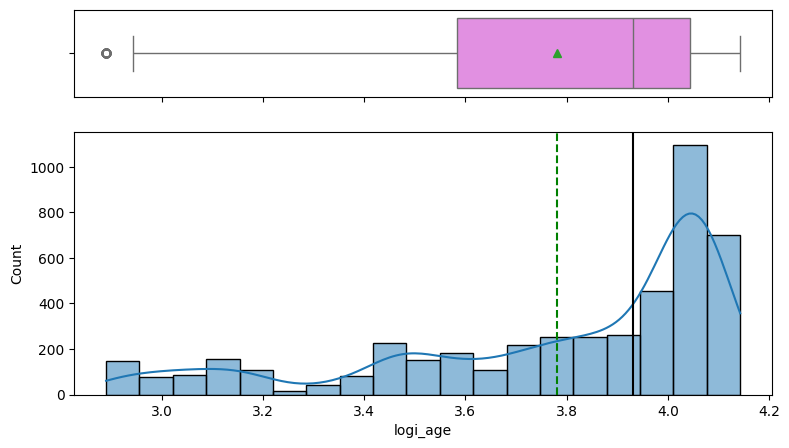

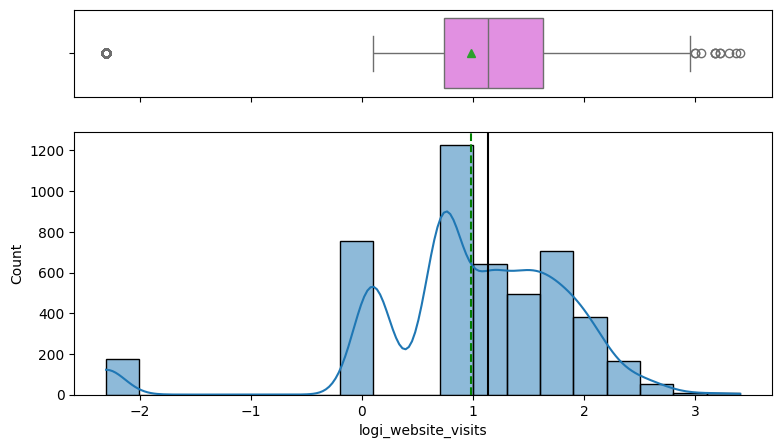

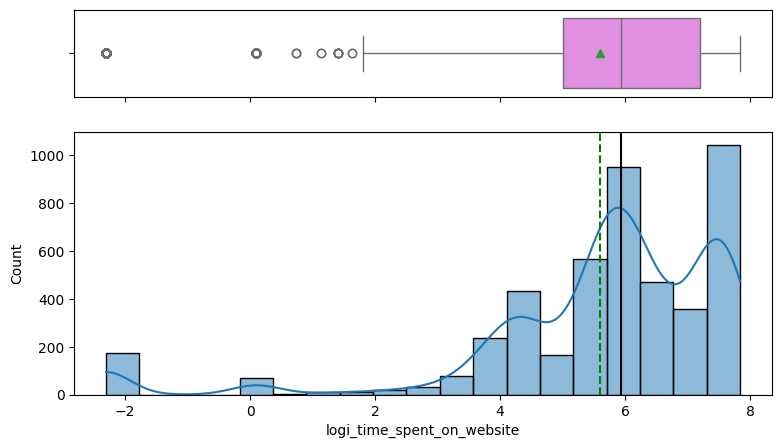

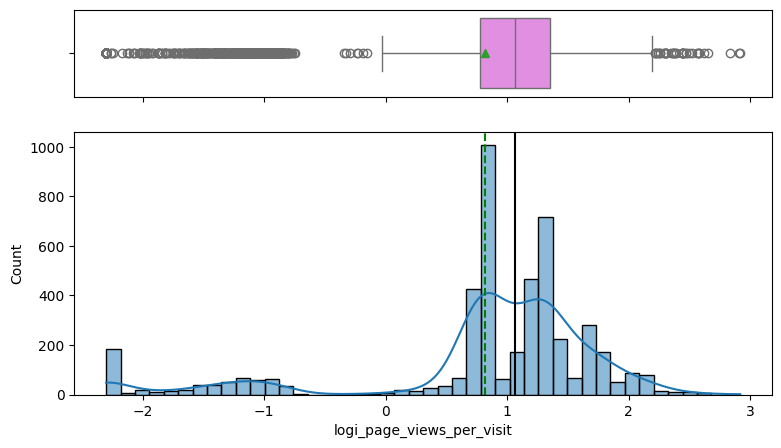

In [ ]:
histogram_boxplot(df, "logi_age", kde = True, bins = 19)
histogram_boxplot(df, "logi_website_visits", kde = True, bins = 19)
histogram_boxplot(df, "logi_time_spent_on_website", kde = True, bins = 19)
histogram_boxplot(df, "logi_page_views_per_visit", kde = True, bins = 44)

<Axes: >

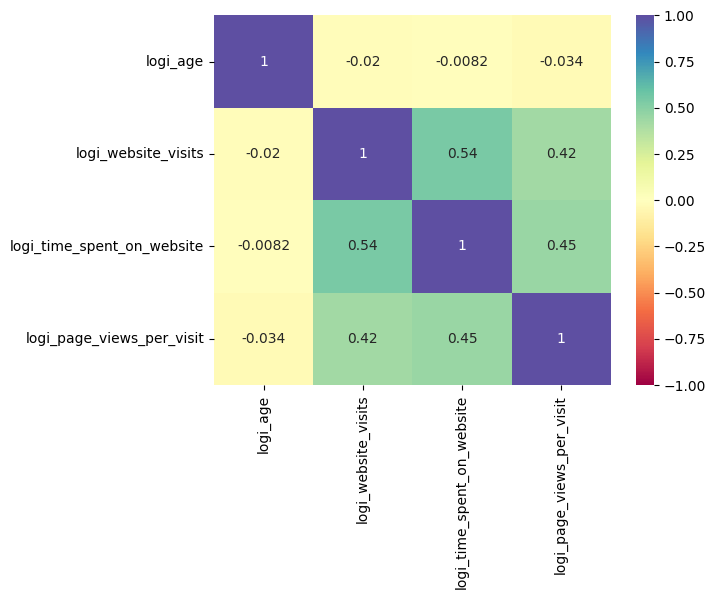

In [ ]:
sns.heatmap(df[['logi_age','logi_website_visits','logi_time_spent_on_website','logi_page_views_per_visit']].corr(), annot = True, cmap = 'Spectral', vmin = -1, vmax = 1)

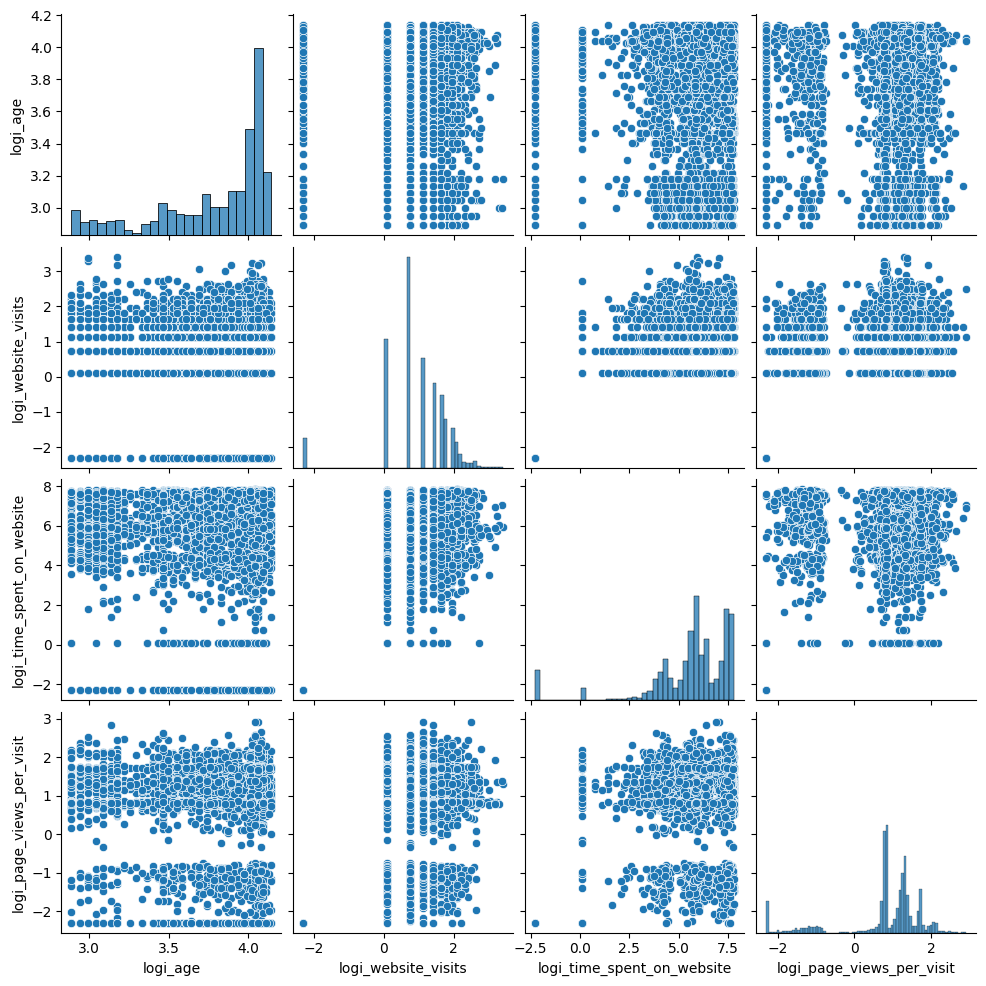

In [ ]:
sns.pairplot(data=df[['logi_age','logi_website_visits','logi_time_spent_on_website','logi_page_views_per_visit']])

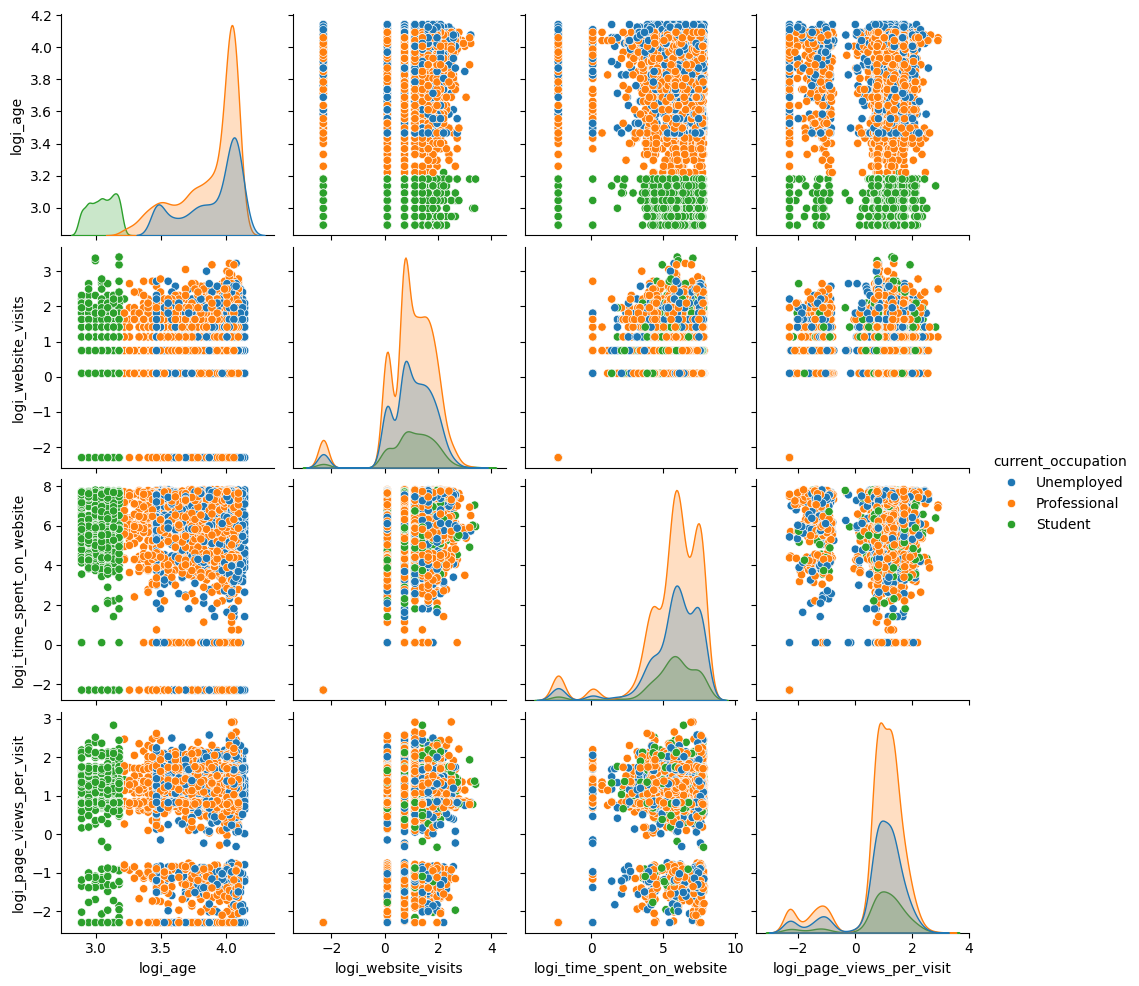

In [ ]:
sns.pairplot(data=df, vars=['logi_age','logi_website_visits','logi_time_spent_on_website','logi_page_views_per_visit'], hue='current_occupation');